In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import warnings
warnings.filterwarnings('ignore')

# Loading and Understanding the Dataset

In [2]:
loan_df = pd.read_csv("loan.csv")

In [3]:
# Shape of the dataset 
loan_df.shape

(39717, 111)

In [4]:
# information on the dataset 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# column names
print(loan_df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [6]:
# dtypes for each columns
loan_df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [7]:
# describing the data
loan_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

In [8]:
# first 5 rows
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [9]:
# last 5 rows
loan_df.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
39712    8.07%        78.42     A        A4             FiSite Research   
39713   10.28%       275.38     C        C1  Squarewave Solutions, Ltd.   
39714    8.07%       156.84     A        A4                         NaN   
39715    7.43%       155.38     A        A2                         NaN   
39716   13.75%       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status issue_d  \
39712    4 years       MORTGAGE    110000.0        Not Verified  Jul-07   
39713    3 years           RENT     18000.0        Not Verified  Jul-07   
39714   < 1 year       MORTGAGE    100000.0        Not Verified  Jul-07   
39715   < 1 year       MORTGAGE    200000.0        Not Verified  Jul-07   
39716   < 1 year            OWN     22000.0        Not Verified  Jun-07   

      loan_status pymnt_plan  \
39712  Fully Paid          n   
39713  Fully Paid          n   
39714  Fully Paid          n   
39715  Fully Paid          n   
39716  Fully Paid          n   

                                                     url  \
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state    dti  delinq_2yrs  \
39712           Home Improvement    802xx         CO  11.33            0   
39713  Retiring credit card debt    274xx         NC   6.40            1   
39714     MBA Loan Consolidation    017xx         MA   2.30            0   
39715                   JAL Loan    208xx         MD   3.72            0   
39716         Consolidation Loan    027xx         MA  14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39712           Nov-90               0                     0.0   
39713           Dec-86               1                     5.0   
39714           Oct-98               0                     0.0   
39715           Nov-88               0                     0.0   
39716           Oct-03               0                    11.0   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39712                     0.0        13        0       7274     13.10%   
39713                     0.0         6        0       8847     26.90%   
39714                     0.0        11        0       9698     19.40%   
39715                     0.0        17        0      85607      0.70%   
39716                     0.0         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39712         40                   f        0.0            0.0  2822.969293   
39713          9                   f        0.0            0.0  9913.491822   
39714         20                   f        0.0         

# Data Handling, Cleaning and Manipuation 

In [10]:
# Print summary of Nulls, Blanks in the dataset
(loan_df.isnull().sum()/len(loan_df.index) * 100)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [11]:
#Information about the data
print('No of Columns:',loan_df.shape[1])
print('No of Rows:',loan_df.shape[0])
print('No of missing values:',loan_df.isnull().sum().sum())
print('No of unique values:',loan_df.nunique().sum())
print('No of duplicates:',loan_df.duplicated().sum())

No of Columns: 111
No of Rows: 39717
No of missing values: 2263364
No of unique values: 416801
No of duplicates: 0


In [12]:
#Sorting columns based on null %
null_percentages = (loan_df.isnull().sum()/len(loan_df.index) * 100).sort_values(ascending=False)
null_percentages

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

# Dropping 80% of null values columns 
def drop_null_values(loan_df, threshold=80):

    null_value_percentage = (loan_df.isnull().sum()/len(loan_df.index) * 100)
    
    columns_to_keep = null_value_percentage[null_value_percentage <= threshold].index 
    
    return loan_df[columns_to_keep]

cleaned_loan_df = drop_null_values(loan_df)

In [13]:
loan_df.drop(null_percentages[null_percentages >= 80].index, axis=1,inplace=True)

In [14]:
# Getting % after dropping 
(loan_df.isnull().sum()/len(loan_df.index) * 100).sort_values(ascending=False)

mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_acc                      0.000000
total_pymnt_inv                0.000000
recoveries                     0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
pub_rec                        0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000


In [15]:
# Finding number of unique values in each column 
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

In [16]:
# dropping columns that have only 1 value 
loan_df.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 
           'acc_now_delinq', 'application_type', 'policy_code', 
           'collections_12_mths_ex_med', 'initial_list_status', 
           'pymnt_plan'], axis=1, inplace=True)


In [17]:
# sorting again 
loan_df.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
mths_since_last_delinq        95
total_acc 

In [18]:
# Getting value counts of each loan_status type 
loan_df["loan_status"].value_counts()


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [19]:
print("Shape before dropping 'current': ", loan_df.shape)

Shape before dropping 'current':  (39717, 46)


In [20]:
# Ideally if they are currently paying back then it wont provide us insights 
# whether if the borrower will default or not, hence dropping these records is needed. 

loan_df = loan_df[loan_df["loan_status"] != "Current"]
print("Shape after dropping 'current': ", loan_df.shape)

Shape after dropping 'current':  (38577, 46)


In [21]:
# Columns that do not have an impact on further analysis, dropping them  

drop_columns = [ 
    "collection_recovery_fee", 
    "delinq_2yrs",
    "desc",
    "emp_title",
    "inq_last_6mths",
    "last_credit_pull_d",
    "open_acc",
    "out_prncp",
    "out_prncp_inv",
    "pub_rec",
    "recoveries",
    "title",
    "total_pymnt",
    "total_pymnt_inv",
    "url",
    "zip_code"
]
loan_df.drop(drop_columns, axis = 1, inplace = True)


In [22]:
loan_df.nunique().sort_values(ascending=False)

id                        38577
member_id                 38577
last_pymnt_amnt           34418
total_rec_int             34025
revol_bal                 21275
installment               15022
funded_amnt_inv            8050
total_rec_prncp            6841
annual_inc                 5215
dti                        2853
total_rec_late_fee         1320
revol_util                 1088
funded_amnt                1019
loan_amnt                   870
earliest_cr_line            524
int_rate                    370
last_pymnt_d                101
mths_since_last_delinq       95
total_acc                    82
issue_d                      55
addr_state                   50
sub_grade                    35
purpose                      14
emp_length                   11
grade                         7
home_ownership                5
pub_rec_bankruptcies          3
verification_status           3
term                          2
loan_status                   2
dtype: int64

In [23]:
# Shape
print("Shape after dropping more irrelevant columns: ", loan_df.shape)

Shape after dropping more irrelevant columns:  (38577, 30)


# Data Type Conversions

In [24]:
loan_df.dtypes

id                          int64
member_id                   int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
earliest_cr_line           object
mths_since_last_delinq    float64
revol_bal                   int64
revol_util                 object
total_acc                   int64
total_rec_prncp           float64
total_rec_int             float64
total_rec_late_fee        float64
last_pymnt_d               object
last_pymnt_amnt           float64
pub_rec_bankru

### Observation: The '%' is present, stripping it 

In [25]:
# Looking at specific columns 
loan_df["int_rate"].head()


0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [26]:
loan_df["revol_util"].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [27]:
loan_df["int_rate"] = loan_df["int_rate"].str.strip("%").astype(float)

In [28]:
loan_df["int_rate"].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [29]:
loan_df["revol_util"] = loan_df["revol_util"].str.strip("%").astype(float)

In [30]:
loan_df["revol_util"].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [31]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
5      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose  \
0     24000.0            Verified  Dec-11   Fully Paid     credit_card   
1     30000.0     Source Verified  Dec-11  Charged Off             car   
2     12252.0        Not Verified  Dec-11   Fully Paid  small_business   
3     49200.0     Source Verified  Dec-11   Fully Paid           other   
5     36000.0     Source Verified  Dec-11   Fully Paid         wedding   

  addr_state    dti earliest_cr_line  mths_since_last_delinq  revol_bal  \
0         AZ  27.65           Jan-85                     NaN      13648   
1         GA   1.00           Apr-99                     NaN       1687   
2         IL   8.72           Nov-01                     NaN       2956   
3         CA  20.00           Feb-96                    35.0       5598   
5         AZ  11.20           Nov-04                     NaN       7963   

   revol_util  total_acc  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0        83.7          9          5000.00         863.16                0.00   
1         9.4          4           456.46         435.17                0.00   
2        98.5         10          2400.00         605.67                0.00   
3        21.0         37         10000.00        2214.92               16.97   
5        28.3         12          5000.00         632.21                0.00   

  last_pymnt_d  last_pymnt_amnt  pub_rec_bankruptcies  
0       Jan-15           171.62                   0.0  
1       Apr-13           119.66                   0.0  
2       Jun-14           649.91                   0.0  
3       Jan-15           357.48                   0.0  
5       Jan-15           161.03                   0.0

### Look at the date columns and convert them 

In [32]:
loan_df["issue_d"].head(20)

0     Dec-11
1     Dec-11
2     Dec-11
3     Dec-11
5     Dec-11
6     Dec-11
7     Dec-11
8     Dec-11
9     Dec-11
10    Dec-11
11    Dec-11
12    Dec-11
13    Dec-11
14    Dec-11
15    Dec-11
16    Dec-11
17    Dec-11
18    Dec-11
19    Dec-11
20    Dec-11
Name: issue_d, dtype: object

In [33]:
# Converting 'issue_d' to datetime dtype 
loan_df["issue_d"] = pd.to_datetime(loan_df["issue_d"], format="%b-%y")


In [34]:
loan_df["issue_d"]

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
6       2011-12-01
7       2011-12-01
8       2011-12-01
9       2011-12-01
10      2011-12-01
11      2011-12-01
12      2011-12-01
13      2011-12-01
14      2011-12-01
15      2011-12-01
16      2011-12-01
17      2011-12-01
18      2011-12-01
19      2011-12-01
20      2011-12-01
21      2011-12-01
22      2011-12-01
23      2011-12-01
24      2011-12-01
25      2011-12-01
26      2011-12-01
27      2011-12-01
28      2011-12-01
29      2011-12-01
30      2011-12-01
31      2011-12-01
33      2011-12-01
34      2011-12-01
35      2011-12-01
36      2011-12-01
37      2011-12-01
38      2011-12-01
40      2011-12-01
41      2011-12-01
42      2011-12-01
43      2011-12-01
44      2011-12-01
45      2011-12-01
46      2011-12-01
47      2011-12-01
48      2011-12-01
49      2011-12-01
50      2011-12-01
51      2011-12-01
52      2011-12-01
53      2011-12-01
54      2011-12-01
55      2011

In [35]:
loan_df["earliest_cr_line"] = pd.to_datetime(loan_df["earliest_cr_line"], format="%b-%y")


In [36]:
loan_df["earliest_cr_line"] 

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
5       2004-11-01
6       2005-07-01
7       2007-01-01
8       2004-04-01
9       2004-09-01
10      1998-01-01
11      1989-10-01
12      2004-04-01
13      2003-07-01
14      1991-05-01
15      2007-09-01
16      1998-10-01
17      1993-08-01
18      2003-10-01
19      2001-01-01
20      1997-11-01
21      1983-02-01
22      1985-07-01
23      2003-04-01
24      2001-06-01
25      2002-02-01
26      2003-10-01
27      2003-10-01
28      1984-08-01
29      2006-11-01
30      1987-12-01
31      1981-11-01
33      2005-04-01
34      2007-10-01
35      2005-07-01
36      2000-12-01
37      2004-11-01
38      2007-04-01
40      2003-01-01
41      1994-03-01
42      1998-09-01
43      2004-06-01
44      1995-11-01
45      1999-07-01
46      1995-06-01
47      2006-11-01
48      1992-09-01
49      2002-01-01
50      1992-04-01
51      1999-07-01
52      2004-04-01
53      2006-10-01
54      2000-05-01
55      1998

In [37]:
loan_df.dtypes

id                                 int64
member_id                          int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
earliest_cr_line          datetime64[ns]
mths_since_last_delinq           float64
revol_bal                          int64
revol_util                       float64
total_acc                          int64
total_rec_prncp 

In [38]:
## Creating new derived columns from date type columns 

loan_df["issue_d_year"] = loan_df["issue_d"].dt.year
loan_df["issue_d_month"] = loan_df["issue_d"].dt.strftime("%b")
loan_df["issue_d_day"] = loan_df["issue_d"].dt.day

In [39]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
5      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status    issue_d  loan_status         purpose  \
0     24000.0            Verified 2011-12-01   Fully Paid     credit_card   
1     30000.0     Source Verified 2011-12-01  Charged Off             car   
2     12252.0        Not Verified 2011-12-01   Fully Paid  small_business   
3     49200.0     Source Verified 2011-12-01   Fully Paid           other   
5     36000.0     Source Verified 2011-12-01   Fully Paid         wedding   

  addr_state    dti earliest_cr_line  mths_since_last_delinq  revol_bal  \
0         AZ  27.65       1985-01-01                     NaN      13648   
1         GA   1.00       1999-04-01                     NaN       1687   
2         IL   8.72       2001-11-01                     NaN       2956   
3         CA  20.00       1996-02-01                    35.0       5598   
5         AZ  11.20       2004-11-01                     NaN       7963   

   revol_util  total_acc  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0        83.7          9          5000.00         863.16                0.00   
1         9.4          4           456.46         435.17                0.00   
2        98.5         10          2400.00         605.67                0.00   
3        21.0         37         10000.00        2214.92               16.97   
5        28.3         12          5000.00         632.21                0.00   

  last_pymnt_d  last_pymnt_amnt  pub_rec_bankruptcies  issue_d_year  \
0       Jan-15           171.62                   0.0          2011   
1       Apr-13           119.66                   0.0          2011   
2       Jun-14           649.91                   0.0          2011   
3       Jan-15           357.48                   0.0          2011   
5       Jan-15           161.03                   0.0          2011   

  issue_d_month  issue_d_day  
0           Dec            1  
1           Dec            1  
2           Dec            1  
3           Dec            1  
5           Dec            1

In [40]:
## checking dtypes again 
loan_df.dtypes

id                                 int64
member_id                          int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
earliest_cr_line          datetime64[ns]
mths_since_last_delinq           float64
revol_bal                          int64
revol_util                       float64
total_acc                          int64
total_rec_prncp 

issue_d_year   

    int64
    
issue_d_month  

    object
    
issue_d_day   

    int64 

In [41]:
# Changing the above data types to object
loan_df["issue_d_year"] = loan_df["issue_d_year"].astype(object)
loan_df["issue_d_day"] = loan_df["issue_d_day"].astype(object)

In [42]:
## checking dtypes again 
loan_df.dtypes

id                                 int64
member_id                          int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
earliest_cr_line          datetime64[ns]
mths_since_last_delinq           float64
revol_bal                          int64
revol_util                       float64
total_acc                          int64
total_rec_prncp 

In [43]:
## Creating new derived columns from date type columns 

loan_df["earliest_cr_year"] = loan_df["earliest_cr_line"].dt.year 
loan_df["earliest_cr_month"] = loan_df["earliest_cr_line"].dt.strftime("%b")

In [44]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
5      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status    issue_d  loan_status         purpose  \
0     24000.0            Verified 2011-12-01   Fully Paid     credit_card   
1     30000.0     Source Verified 2011-12-01  Charged Off             car   
2     12252.0        Not Verified 2011-12-01   Fully Paid  small_business   
3     49200.0     Source Verified 2011-12-01   Fully Paid           other   
5     36000.0     Source Verified 2011-12-01   Fully Paid         wedding   

  addr_state    dti earliest_cr_line  mths_since_last_delinq  revol_bal  \
0         AZ  27.65       1985-01-01                     NaN      13648   
1         GA   1.00       1999-04-01                     NaN       1687   
2         IL   8.72       2001-11-01                     NaN       2956   
3         CA  20.00       1996-02-01                    35.0       5598   
5         AZ  11.20       2004-11-01                     NaN       7963   

   revol_util  total_acc  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0        83.7          9          5000.00         863.16                0.00   
1         9.4          4           456.46         435.17                0.00   
2        98.5         10          2400.00         605.67                0.00   
3        21.0         37         10000.00        2214.92               16.97   
5        28.3         12          5000.00         632.21                0.00   

  last_pymnt_d  last_pymnt_amnt  pub_rec_bankruptcies issue_d_year  \
0       Jan-15           171.62                   0.0         2011   
1       Apr-13           119.66                   0.0         2011   
2       Jun-14           649.91                   0.0         2011   
3       Jan-15           357.48                   0.0         2011   
5       Jan-15           161.03                   0.0         2011   

  issue_d_month issue_d_day  earliest_cr_year earliest_cr_month  
0           Dec           1              1985               Jan  
1           Dec           1              1999               Apr  
2           Dec           1              2001               Nov  
3           Dec           1              1996               Feb  
5           Dec           1              2004               Nov

In [45]:
## checking dtypes again 
loan_df.dtypes

id                                 int64
member_id                          int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
earliest_cr_line          datetime64[ns]
mths_since_last_delinq           float64
revol_bal                          int64
revol_util                       float64
total_acc                          int64
total_rec_prncp 

In [46]:
loan_df['earliest_cr_year'] = loan_df['earliest_cr_year'].astype(object)

In [47]:
loan_df.dtypes

id                                 int64
member_id                          int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
earliest_cr_line          datetime64[ns]
mths_since_last_delinq           float64
revol_bal                          int64
revol_util                       float64
total_acc                          int64
total_rec_prncp 

### emp_length = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

#### The emp_length column will be converted to an integer with the following logic:
< 1 year: 0

2 years: 2

3 years: 3

4 years: 4

5 years: 5

1 year: 1

6 years: 6

7 years: 7

8 years: 8

9 years: 9

10+ years: 10

In [48]:
loan_df["emp_length"]

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
6          8 years
7          9 years
8          4 years
9         < 1 year
10         5 years
11       10+ years
12        < 1 year
13         3 years
14         3 years
15        < 1 year
16         4 years
17       10+ years
18          1 year
19         6 years
20         3 years
21       10+ years
22       10+ years
23         5 years
24          1 year
25         2 years
26         9 years
27         2 years
28       10+ years
29        < 1 year
30         7 years
31         5 years
33         2 years
34         7 years
35       10+ years
36         2 years
37          1 year
38          1 year
40         4 years
41       10+ years
42         9 years
43       10+ years
44       10+ years
45         6 years
46       10+ years
47         6 years
48       10+ years
49         5 years
50         8 years
51         9 years
52        < 1 year
53         4 years
54          1 year
55         7

### Observations: 

1. "+" symbol is there
2. datatype is object 
3. "<" symbol is there
4. Couple of NaN values are there
5. years is present in a string format 

In [49]:
# Value counts information
loan_df["emp_length"].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [50]:
# Checking null values 
loan_df["emp_length"].isna().sum()

1033

In [51]:
# Exploring annual_inc column 
loan_df["annual_inc"].head(5)

0    24000.0
1    30000.0
2    12252.0
3    49200.0
5    36000.0
Name: annual_inc, dtype: float64

In [52]:
# Annual income of loan applicants whose employment length is missing
loan_df[loan_df["emp_length"].isna()]["annual_inc"].describe()

count      1033.000000
mean      45913.330649
std       37964.731520
min        4200.000000
25%       25000.000000
50%       38368.000000
75%       57600.000000
max      648000.000000
Name: annual_inc, dtype: float64

In [53]:

loan_df["emp_length"].mode()

0    10+ years
dtype: object

In [54]:
# Most frequent Annual income of loan applicants whose employment length is missing
loan_df[loan_df["emp_length"].isnull()]['annual_inc'].mode()

0    36000.0
dtype: float64

In [57]:
loan_df["emp_length"].value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [58]:
print(loan_df["emp_length"].unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years']


In [59]:
loan_df.head(100)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0    1077501    1296599       5000         5000       4975.00000   36 months   
1    1077430    1314167       2500         2500       2500.00000   60 months   
2    1077175    1313524       2400         2400       2400.00000   36 months   
3    1076863    1277178      10000        10000      10000.00000   36 months   
5    1075269    1311441       5000         5000       5000.00000   36 months   
6    1069639    1304742       7000         7000       7000.00000   60 months   
7    1072053    1288686       3000         3000       3000.00000   36 months   
8    1071795    1306957       5600         5600       5600.00000   60 months   
9    1071570    1306721       5375         5375       5350.00000   60 months   
10   1070078    1305201       6500         6500       6500.00000   60 months   
11   1069908    1305008      12000        12000      12000.00000   36 months   
12   1064687    1298717       9000         9000       9000.00000   36 months   
13   1069866    1304956       3000         3000       3000.00000   36 months   
14   1069057    1303503      10000        10000      10000.00000   36 months   
15   1069759    1304871       1000         1000       1000.00000   36 months   
16   1065775    1299699      10000        10000      10000.00000   36 months   
17   1069971    1304884       3600         3600       3600.00000   36 months   
18   1062474    1294539       6000         6000       6000.00000   36 months   
19   1069742    1304855       9200         9200       9200.00000   36 months   
20   1069740    1284848      20250        20250      19142.16108   60 months   
21   1039153    1269083      21000        21000      21000.00000   36 months   
22   1069710    1304821      10000        10000      10000.00000   36 months   
23   1069700    1304810      10000        10000      10000.00000   36 months   
24   1069559    1304634       6000         6000       6000.00000   36 months   
25   1069697    1273773      15000        15000      15000.00000   36 months   
26   1069800    1304679      15000        15000       8725.00000   36 months   
27   1069657    1304764       5000         5000       5000.00000   60 months   
28   1069799    1304678       4000         4000       4000.00000   36 months   
29   1047704    1278806       8500         8500       8500.00000   36 months   
30   1032111    1261745       4375         4375       4375.00000   36 months   
31   1069539    1304608      31825        31825      31825.00000   36 months   
33   1069591    1304289       5000         5000       5000.00000   36 months   
34   1069530    1291365       7000         7000       7000.00000   36 months   
35   1069522    1304589      12400        12400      12400.00000   36 months   
36   1069361    1304255      10800        10800      10800.00000   36 months   
37   1069357    1304251      15000        15000      15000.00000   36 months   
38   1069356    1304250       6000         6000       6000.00000   36 months   
40   1067573    1301955       9600         9600       9600.00000   36 months   
41   1069506    1304567      12000        12000      12000.00000   36 months   
42   1069314    1304202       3000         3000       3000.00000   36 months   
43   1060578    1292332       4400         4400       4400.00000   36 months   
44   1069469    1304526       6000         6000       6000.00000   36 months   
45   1051117    1282787      14000        14000      14000.00000   36 months   
46   1069465    1304521       5000         5000       5000.00000   36 months   
47   1069283    1304166      10000        10000      10000.00000   36 months   
48   1069287    1304171      10000        10000      10000.00000   36 months   
49   1069453    1303701      11000        11000      11000.00000   36 months   
50   1069248    1304123      15000        15000      15000.00000   36 months   
51   1068120    1302485      25600        25600      25350.00000   36 months   
52   10692

In [60]:
# Home ownership column value counts
loan_df["home_ownership"].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [61]:
# imputing none as other
loan_df["home_ownership"].replace("NONE","OTHER",inplace=True)

In [62]:
# Home ownership column value counts
loan_df["home_ownership"].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: home_ownership, dtype: int64

In [63]:
loan_df["verification_status"].value_counts() 

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [64]:
# Replacing the 'Source Verified' values as 'Verified' since both values mean the
# same thing i.e. the loan applicant has some source of income which is verified

loan_df["verification_status"].replace("Source Verified", "Verified", inplace=True)


In [65]:
loan_df["verification_status"].value_counts() 

Verified        21883
Not Verified    16694
Name: verification_status, dtype: int64

In [66]:
loan_df["pub_rec_bankruptcies"]

0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       0.0
49       0.0
50       0.0
51       0.0
52       0.0
53       0.0
54       0.0
55       0.0
56       0.0
57       0.0
58       0.0
59       0.0
60       0.0
61       0.0
62       0.0
63       0.0
64       0.0
65       0.0
66       1.0
67       0.0
68       0.0
69       0.0
70       1.0
71       0.0
72       0.0
73       0.0
74       0.0
75       0.0
76       0.0
77       1.0
78       0.0
79       0.0

In [67]:
loan_df["pub_rec_bankruptcies"].isnull().sum()

697

In [68]:
loan_df[loan_df["pub_rec_bankruptcies"].isnull()].head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
35006  69001     265533      15000        15000     14875.000000   36 months   
35058  59006     154254       3000         3000      2988.236621   36 months   
35362  65426     232106       4000         4000      3892.258856   36 months   
38443  68926     264924       2300         2300       589.605658   36 months   
38717  69251     267771       6000         6000       500.000000   36 months   

       int_rate  installment grade sub_grade emp_length home_ownership  \
35006      8.94       476.58     A        A5   < 1 year       MORTGAGE   
35058     14.26       102.92     C        C5    3 years       MORTGAGE   
35362     11.14       131.22     B        B1   < 1 year       MORTGAGE   
38443     13.17        77.69     D        D2  10+ years           RENT   
38717      8.00       188.02     A        A3   < 1 year       MORTGAGE   

       annual_inc verification_status    issue_d  loan_status      purpose  \
35006    110000.0        Not Verified 2009-09-01   Fully Paid  credit_card   
35058     80800.0        Not Verified 2009-09-01   Fully Paid  credit_card   
35362     60000.0        Not Verified 2009-08-01  Charged Off          car   
38443     37152.0            Verified 2008-08-01   Fully Paid       moving   
38717     75000.0        Not Verified 2008-05-01   Fully Paid        other   

      addr_state    dti earliest_cr_line  mths_since_last_delinq  revol_bal  \
35006         NY   7.07       1991-11-01                     0.0       7586   
35058         TX  14.97       1998-07-01                    13.0       4740   
35362         MI  11.08       1995-08-01                     0.0      24220   
38443         NJ   2.26       1997-12-01                    46.0       2211   
38717         OH  16.08       1994-12-01                     0.0      29797   

       revol_util  total_acc  total_rec_prncp  total_rec_int  \
35006        52.7         19         15000.00        2135.51   
35058        39.5         23          3000.00         705.00   
35362        68.6         33          2170.35         584.85   
38443        88.4         13          2300.00         496.60   
38717        23.2         39          5999.99         768.76   

       total_rec_late_fee last_pymnt_d  last_pymnt_amnt  pub_rec_bankruptcies  \
35006                 0.0       Jul-12          1919.13                   NaN   
35058                 0.0       Oct-12           111.23                   NaN   
35362                 0.0       Jun-11           131.22                   NaN   
38443                 0.0       Sep-11            77.78                   NaN   
38717                15.0       May-11           189.36                   NaN   

      issue_d_year issue_d_month issue_d_day earliest_cr_year  \
35006         2009           Sep           1             1991   
35058         2009           Sep           1             1998   
35362         2009           Aug           1             1995   
38443         2008           Aug           1             1997   
38717         2008           May           1             1994   

      earliest_cr_month  
35006               Nov  
35058               Jul  
35362               Aug  
38443               Dec  
38717               Dec

#### There are 697 null values for pub_rec_bankruptcies. Dropping those rows as they cannot be imputed.


In [69]:
loan_df = loan_df[loan_df["pub_rec_bankruptcies"].notna()]

In [70]:
loan_df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
earliest_cr_line              0
mths_since_last_delinq    24899
revol_bal                     0
revol_util                   50
total_acc                     0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
last_pymnt_d                 71
last_pymnt_amnt               0
pub_rec_bankruptcies          0
issue_d_year                  0
issue_d_

In [71]:
# Dropping last_pymnt_d as it is after loan approval and not available during 
# sanctioning the loan 
loan_df.drop(["mths_since_last_delinq", "last_pymnt_d"], axis=1, inplace=True)

In [72]:
loan_df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
addr_state               0
dti                      0
earliest_cr_line         0
revol_bal                0
revol_util              50
total_acc                0
total_rec_prncp          0
total_rec_int            0
total_rec_late_fee       0
last_pymnt_amnt          0
pub_rec_bankruptcies     0
issue_d_year             0
issue_d_month            0
issue_d_day              0
earliest_cr_year         0
earliest_cr_month        0
dtype: int64

In [73]:
loan_df.drop(["revol_util"], axis=1, inplace=True)

In [74]:
loan_df.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
revol_bal               0
total_acc               0
total_rec_prncp         0
total_rec_int           0
total_rec_late_fee      0
last_pymnt_amnt         0
pub_rec_bankruptcies    0
issue_d_year            0
issue_d_month           0
issue_d_day             0
earliest_cr_year        0
earliest_cr_month       0
dtype: int64

In [75]:
# purpose loan value counts
loan_df["purpose"].value_counts()

debt_consolidation    17764
credit_card            4929
other                  3760
home_improvement       2827
major_purchase         2131
small_business         1701
car                    1482
wedding                 907
medical                 672
moving                  567
vacation                369
house                   362
educational             307
renewable_energy        102
Name: purpose, dtype: int64

In [76]:
loan_df["loan_status"].value_counts()

Fully Paid     32371
Charged Off     5509
Name: loan_status, dtype: int64

In [77]:
loan_df.head(20)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   1077501    1296599       5000         5000       4975.00000   36 months   
1   1077430    1314167       2500         2500       2500.00000   60 months   
2   1077175    1313524       2400         2400       2400.00000   36 months   
3   1076863    1277178      10000        10000      10000.00000   36 months   
5   1075269    1311441       5000         5000       5000.00000   36 months   
6   1069639    1304742       7000         7000       7000.00000   60 months   
7   1072053    1288686       3000         3000       3000.00000   36 months   
8   1071795    1306957       5600         5600       5600.00000   60 months   
9   1071570    1306721       5375         5375       5350.00000   60 months   
10  1070078    1305201       6500         6500       6500.00000   60 months   
11  1069908    1305008      12000        12000      12000.00000   36 months   
12  1064687    1298717       9000         9000       9000.00000   36 months   
13  1069866    1304956       3000         3000       3000.00000   36 months   
14  1069057    1303503      10000        10000      10000.00000   36 months   
15  1069759    1304871       1000         1000       1000.00000   36 months   
16  1065775    1299699      10000        10000      10000.00000   36 months   
17  1069971    1304884       3600         3600       3600.00000   36 months   
18  1062474    1294539       6000         6000       6000.00000   36 months   
19  1069742    1304855       9200         9200       9200.00000   36 months   
20  1069740    1284848      20250        20250      19142.16108   60 months   

    int_rate  installment grade sub_grade emp_length home_ownership  \
0      10.65       162.87     B        B2  10+ years           RENT   
1      15.27        59.83     C        C4   < 1 year           RENT   
2      15.96        84.33     C        C5  10+ years           RENT   
3      13.49       339.31     C        C1  10+ years           RENT   
5       7.90       156.46     A        A4    3 years           RENT   
6      15.96       170.08     C        C5    8 years           RENT   
7      18.64       109.43     E        E1    9 years           RENT   
8      21.28       152.39     F        F2    4 years            OWN   
9      12.69       121.45     B        B5   < 1 year           RENT   
10     14.65       153.45     C        C3    5 years            OWN   
11     12.69       402.54     B        B5  10+ years            OWN   
12     13.49       305.38     C        C1   < 1 year           RENT   
13      9.91        96.68     B        B1    3 years           RENT   
14     10.65       325.74     B        B2    3 years           RENT   
15     16.29        35.31     D        D1   < 1 year           RENT   
16     15.27       347.98     C        C4    4 years           RENT   
17      6.03       109.57     A        A1  10+ years       MORTGAGE   
18     11.71       198.46     B        B3     1 year       MORTGAGE   
19      6.03       280.01     A        A1    6 years           RENT   
20     15.27       484.63     C        C4    3 years           RENT   

    annual_inc verification_status    issue_d  loan_status  \
0     24000.00            Verified 2011-12-01   Fully Paid   
1     30000.00            Verified 2011-12-01  Charged Off   
2     12252.00        Not Verified 2011-12-01   Fully Paid   
3     49200.00            Verified 2011-12-01   Fully Paid   
5     36000.00            Verified 2011-12-01   Fully Paid   
6     47004.00        Not Verified 2011-12-01   Fully Paid   
7     48000.00            Verified 2011-12-01   Fully Paid   
8     40000.00            Verified 2011-12-01  Charged Off   
9     15000.00            Verified 2011-12-01  Charged Off   
10    72000.00        Not Verified 2011-12-01   Fully Paid   
11    75000.00            Verified 2011-12-01   Fully Paid   
12    30000.00            Verified 2011-12-01  Charged Off   
13    15000.00            Verified 2011-12-01   Ful

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
5      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status    issue_d  loan_status         purpose  \
0     24000.0            Verified 2011-12-01   Fully Paid     credit_card   
1     30000.0            Verified 2011-12-01  Charged Off             car   
2     12252.0        Not Verified 2011-12-01   Fully Paid  small_business   
3     49200.0            Verified 2011-12-01   Fully Paid           other   
5     36000.0            Verified 2011-12-01   Fully Paid         wedding   

  addr_state    dti earliest_cr_line  revol_bal  total_acc  total_rec_prncp  \
0         AZ  27.65       1985-01-01      13648          9          5000.00   
1         GA   1.00       1999-04-01       1687          4           456.46   
2         IL   8.72       2001-11-01       2956         10          2400.00   
3         CA  20.00       1996-02-01       5598         37         10000.00   
5         AZ  11.20       2004-11-01       7963         12          5000.00   

   total_rec_int  total_rec_late_fee  last_pymnt_amnt  pub_rec_bankruptcies  \
0         863.16                0.00           171.62                   0.0   
1         435.17                0.00           119.66                   0.0   
2         605.67                0.00           649.91                   0.0   
3        2214.92               16.97           357.48                   0.0   
5         632.21                0.00           161.03                   0.0   

  issue_d_year issue_d_month issue_d_day earliest_cr_year earliest_cr_month  
0         2011           Dec           1             1985               Jan  
1         2011           Dec           1             1999               Apr  
2         2011           Dec           1             2001               Nov  
3         2011           Dec           1             1996               Feb  
5         2011           Dec           1             2004               Nov

In [80]:
#renaming term column
loan_df.rename(columns={'term': 'term(in months)'}, inplace=True)

In [81]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0  1077501    1296599       5000         5000           4975.0   
1  1077430    1314167       2500         2500           2500.0   
2  1077175    1313524       2400         2400           2400.0   
3  1076863    1277178      10000        10000          10000.0   
5  1075269    1311441       5000         5000           5000.0   

  term(in months)  int_rate  installment grade sub_grade emp_length  \
0       36 months     10.65       162.87     B        B2  10+ years   
1       60 months     15.27        59.83     C        C4   < 1 year   
2       36 months     15.96        84.33     C        C5  10+ years   
3       36 months     13.49       339.31     C        C1  10+ years   
5       36 months      7.90       156.46     A        A4    3 years   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0            Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0            Verified 2011-12-01   Fully Paid   
5           RENT     36000.0            Verified 2011-12-01   Fully Paid   

          purpose addr_state    dti earliest_cr_line  revol_bal  total_acc  \
0     credit_card         AZ  27.65       1985-01-01      13648          9   
1             car         GA   1.00       1999-04-01       1687          4   
2  small_business         IL   8.72       2001-11-01       2956         10   
3           other         CA  20.00       1996-02-01       5598         37   
5         wedding         AZ  11.20       2004-11-01       7963         12   

   total_rec_prncp  total_rec_int  total_rec_late_fee  last_pymnt_amnt  \
0          5000.00         863.16                0.00           171.62   
1           456.46         435.17                0.00           119.66   
2          2400.00         605.67                0.00           649.91   
3         10000.00        2214.92               16.97           357.48   
5          5000.00         632.21                0.00           161.03   

   pub_rec_bankruptcies issue_d_year issue_d_month issue_d_day  \
0                   0.0         2011           Dec           1   
1                   0.0         2011           Dec           1   
2                   0.0         2011           Dec           1   
3                   0.0         2011           Dec           1   
5                   0.0         2011           Dec           1   

  earliest_cr_year earliest_cr_month  
0             1985               Jan  
1             1999               Apr  
2             2001               Nov  
3             1996               Feb  
5             2004               Nov

In [83]:
# Removing 'months' in term column
loan_df["term(in months)"] = loan_df["term(in months)"].str.replace("months","").str.strip()

In [85]:
loan_df.head(50)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0   1077501    1296599       5000         5000       4975.00000   
1   1077430    1314167       2500         2500       2500.00000   
2   1077175    1313524       2400         2400       2400.00000   
3   1076863    1277178      10000        10000      10000.00000   
5   1075269    1311441       5000         5000       5000.00000   
6   1069639    1304742       7000         7000       7000.00000   
7   1072053    1288686       3000         3000       3000.00000   
8   1071795    1306957       5600         5600       5600.00000   
9   1071570    1306721       5375         5375       5350.00000   
10  1070078    1305201       6500         6500       6500.00000   
11  1069908    1305008      12000        12000      12000.00000   
12  1064687    1298717       9000         9000       9000.00000   
13  1069866    1304956       3000         3000       3000.00000   
14  1069057    1303503      10000        10000      10000.00000   
15  1069759    1304871       1000         1000       1000.00000   
16  1065775    1299699      10000        10000      10000.00000   
17  1069971    1304884       3600         3600       3600.00000   
18  1062474    1294539       6000         6000       6000.00000   
19  1069742    1304855       9200         9200       9200.00000   
20  1069740    1284848      20250        20250      19142.16108   
21  1039153    1269083      21000        21000      21000.00000   
22  1069710    1304821      10000        10000      10000.00000   
23  1069700    1304810      10000        10000      10000.00000   
24  1069559    1304634       6000         6000       6000.00000   
25  1069697    1273773      15000        15000      15000.00000   
26  1069800    1304679      15000        15000       8725.00000   
27  1069657    1304764       5000         5000       5000.00000   
28  1069799    1304678       4000         4000       4000.00000   
29  1047704    1278806       8500         8500       8500.00000   
30  1032111    1261745       4375         4375       4375.00000   
31  1069539    1304608      31825        31825      31825.00000   
33  1069591    1304289       5000         5000       5000.00000   
34  1069530    1291365       7000         7000       7000.00000   
35  1069522    1304589      12400        12400      12400.00000   
36  1069361    1304255      10800        10800      10800.00000   
37  1069357    1304251      15000        15000      15000.00000   
38  1069356    1304250       6000         6000       6000.00000   
40  1067573    1301955       9600         9600       9600.00000   
41  1069506    1304567      12000        12000      12000.00000   
42  1069314    1304202       3000         3000       3000.00000   
43  1060578    1292332       4400         4400       4400.00000   
44  1069469    1304526       6000         6000       6000.00000   
45  1051117    1282787      14000        14000      14000.00000   
46  1069465    1304521       5000         5000       5000.00000   
47  1069283    1304166      10000        10000      10000.00000   
48  1069287    1304171      10000        10000      10000.00000   
49  1069453    1303701      11000        11000      11000.00000   
50  1069248    1304123      15000        15000      15000.00000   
51  1068120    1302485      25600        25600      25350.00000   
52  1069244    1304117       7000         7000       7000.00000   

   term(in months)  int_rate  installment grade sub_grade emp_length  \
0               36     10.65       162.87     B        B2  10+ years   
1               60     15.27        59.83     C        C4   < 1 year   
2               36     15.96        84.33     C        C5  10+ years   
3               36     13.49       339.31     C        C1  10+ years   
5               36      7.90       156.46     A        A4    3 years   
6               60     15.96       170.08     C        C5    8 years   
7               36     18.64       109.43     E        E1    9 years   
8              

### Observation: Employment length has 1033 missing values, which means either they are not employed or self-employed (business owners). Considering they have a decent average annual income, we have assumed that these are business owners and we have added their employment duration with the mode value of emp_length which is 10+ years

In [86]:
emp_length_mapping_dict = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

loan_df['emp_length'] = loan_df['emp_length'].map(emp_length_mapping_dict)


In [89]:
# checking shape 
loan_df.shape

(37880, 32)

In [90]:
# columns
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term(in months)', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'revol_bal', 'total_acc', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt',
       'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month', 'issue_d_day',
       'earliest_cr_year', 'earliest_cr_month'],
      dtype='object')

In [91]:
# checing dtypes again 
loan_df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term(in months)                 object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
earliest_cr_line        datetime64[ns]
revol_bal                        int64
total_acc                        int64
total_rec_prncp                float64
total_rec_int                  float64
total_rec_late_fee             float64
last_pymnt_amnt          

### Observation: Loan amounts can be kept in a bucket so it is easier to plot and identify?

Max: 35000 

min: 500 

50%: approximately 9700 



In [94]:
loan_df["loan_amnt"].describe()

count    37880.000000
mean     11067.092793
std       7364.014949
min        500.000000
25%       5375.000000
50%       9637.500000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Can be categorized in the following buckets 

1) 0-5k

2) 5-10k

3) 10-15k

4) 15-20k

5) 20-25k

6) 25k+

loan_amount_thresholds = [5000,10000,15000,20000,25000]
loan_amount_labels = ["0-5k", "5K-10K", "10K-15K", "15K-20K", "20K-25K", "25k above"]

loan_df['loan_amount_bucket'] = pd.cut(
    loan_df['loan_amnt'],  # Replace 'loan_amount' with your column name
    bins=loan_amount_thresholds,
    labels=loan_amount_labels,
    right=False  # Use [x, y) intervals
)

In [101]:
loan_df.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0   1077501    1296599       5000         5000           4975.0   
1   1077430    1314167       2500         2500           2500.0   
2   1077175    1313524       2400         2400           2400.0   
3   1076863    1277178      10000        10000          10000.0   
5   1075269    1311441       5000         5000           5000.0   
6   1069639    1304742       7000         7000           7000.0   
7   1072053    1288686       3000         3000           3000.0   
8   1071795    1306957       5600         5600           5600.0   
9   1071570    1306721       5375         5375           5350.0   
10  1070078    1305201       6500         6500           6500.0   

   term(in months)  int_rate  installment grade sub_grade  emp_length  \
0               36     10.65       162.87     B        B2          10   
1               60     15.27        59.83     C        C4           0   
2               36     15.96        84.33     C        C5          10   
3               36     13.49       339.31     C        C1          10   
5               36      7.90       156.46     A        A4           3   
6               60     15.96       170.08     C        C5           8   
7               36     18.64       109.43     E        E1           9   
8               60     21.28       152.39     F        F2           4   
9               60     12.69       121.45     B        B5           0   
10              60     14.65       153.45     C        C3           5   

   home_ownership  annual_inc verification_status    issue_d  loan_status  \
0            RENT     24000.0            Verified 2011-12-01   Fully Paid   
1            RENT     30000.0            Verified 2011-12-01  Charged Off   
2            RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3            RENT     49200.0            Verified 2011-12-01   Fully Paid   
5            RENT     36000.0            Verified 2011-12-01   Fully Paid   
6            RENT     47004.0        Not Verified 2011-12-01   Fully Paid   
7            RENT     48000.0            Verified 2011-12-01   Fully Paid   
8             OWN     40000.0            Verified 2011-12-01  Charged Off   
9            RENT     15000.0            Verified 2011-12-01  Charged Off   
10            OWN     72000.0        Not Verified 2011-12-01   Fully Paid   

               purpose addr_state    dti earliest_cr_line  revol_bal  \
0          credit_card         AZ  27.65       1985-01-01      13648   
1                  car         GA   1.00       1999-04-01       1687   
2       small_business         IL   8.72       2001-11-01       2956   
3                other         CA  20.00       1996-02-01       5598   
5              wedding         AZ  11.20       2004-11-01       7963   
6   debt_consolidation         NC  23.51       2005-07-01      17726   
7                  car         CA   5.35       2007-01-01       8221   
8       small_business         CA   5.55       2004-04-01       5210   
9                other         TX  18.08       2004-09-01       9279   
10  debt_consolidation         AZ  16.12       1998-01-01       4032   

    total_acc  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0           9          5000.00         863.16                0.00   
1           4           456.46         435.17                0.00   
2          10          2400.00         605.67                0.00   
3          37         10000.00        2214.92               16.97   
5          12          5000.00         632.21                0.00   
6          11          6985.61        3125.23                0.00   
7           4          3000.00         939.14                0.00   
8          13           162.02         294.94                0.00   
9           3           673.48         533.42                0.00   
10         23          6500.00        1178.02                0.00   

    last_pymnt_amnt  pub_rec_bankruptcies issue_d_year issue_d_mon

In [110]:
loan_df["purpose"].value_counts()

debt_consolidation    17764
credit_card            4929
other                  3760
home_improvement       2827
major_purchase         2131
small_business         1701
car                    1482
wedding                 907
medical                 672
moving                  567
vacation                369
house                   362
educational             307
renewable_energy        102
Name: purpose, dtype: int64

# UNIVARIATE ANALYSIS

### Univariate analysis is the simplest form of data analysis, where a single variable is analyzed at a time to understand its distribution, central tendency (mean, median, mode), dispersion (variance, standard deviation), and range. The main goal is to summarize and describe the variable's characteristics.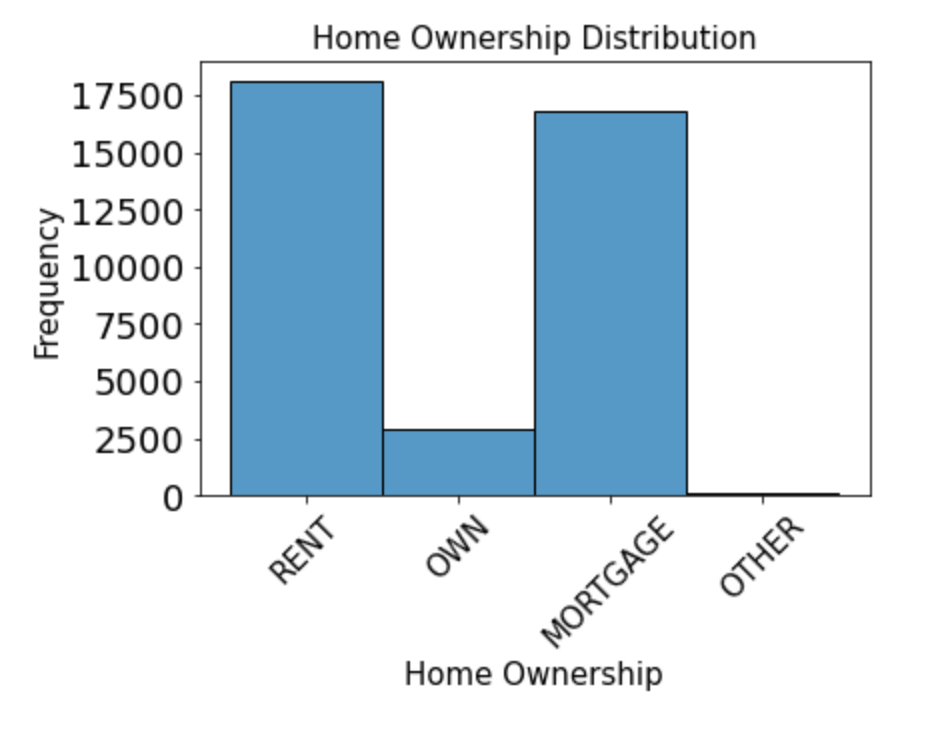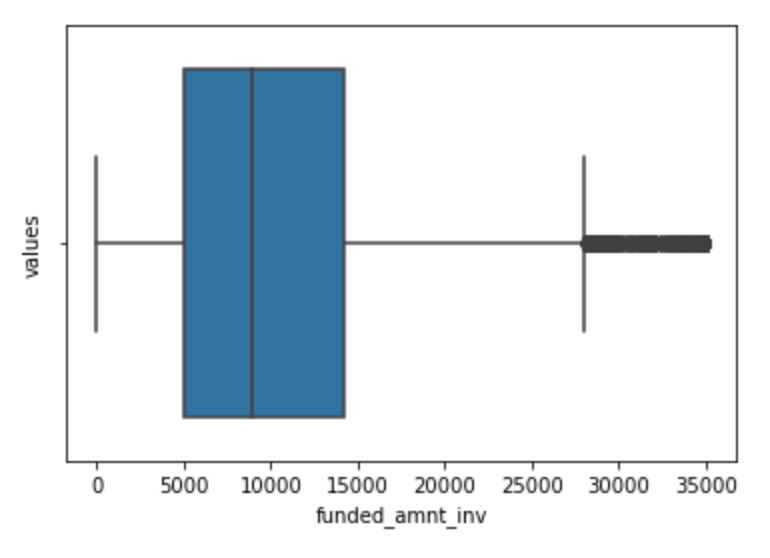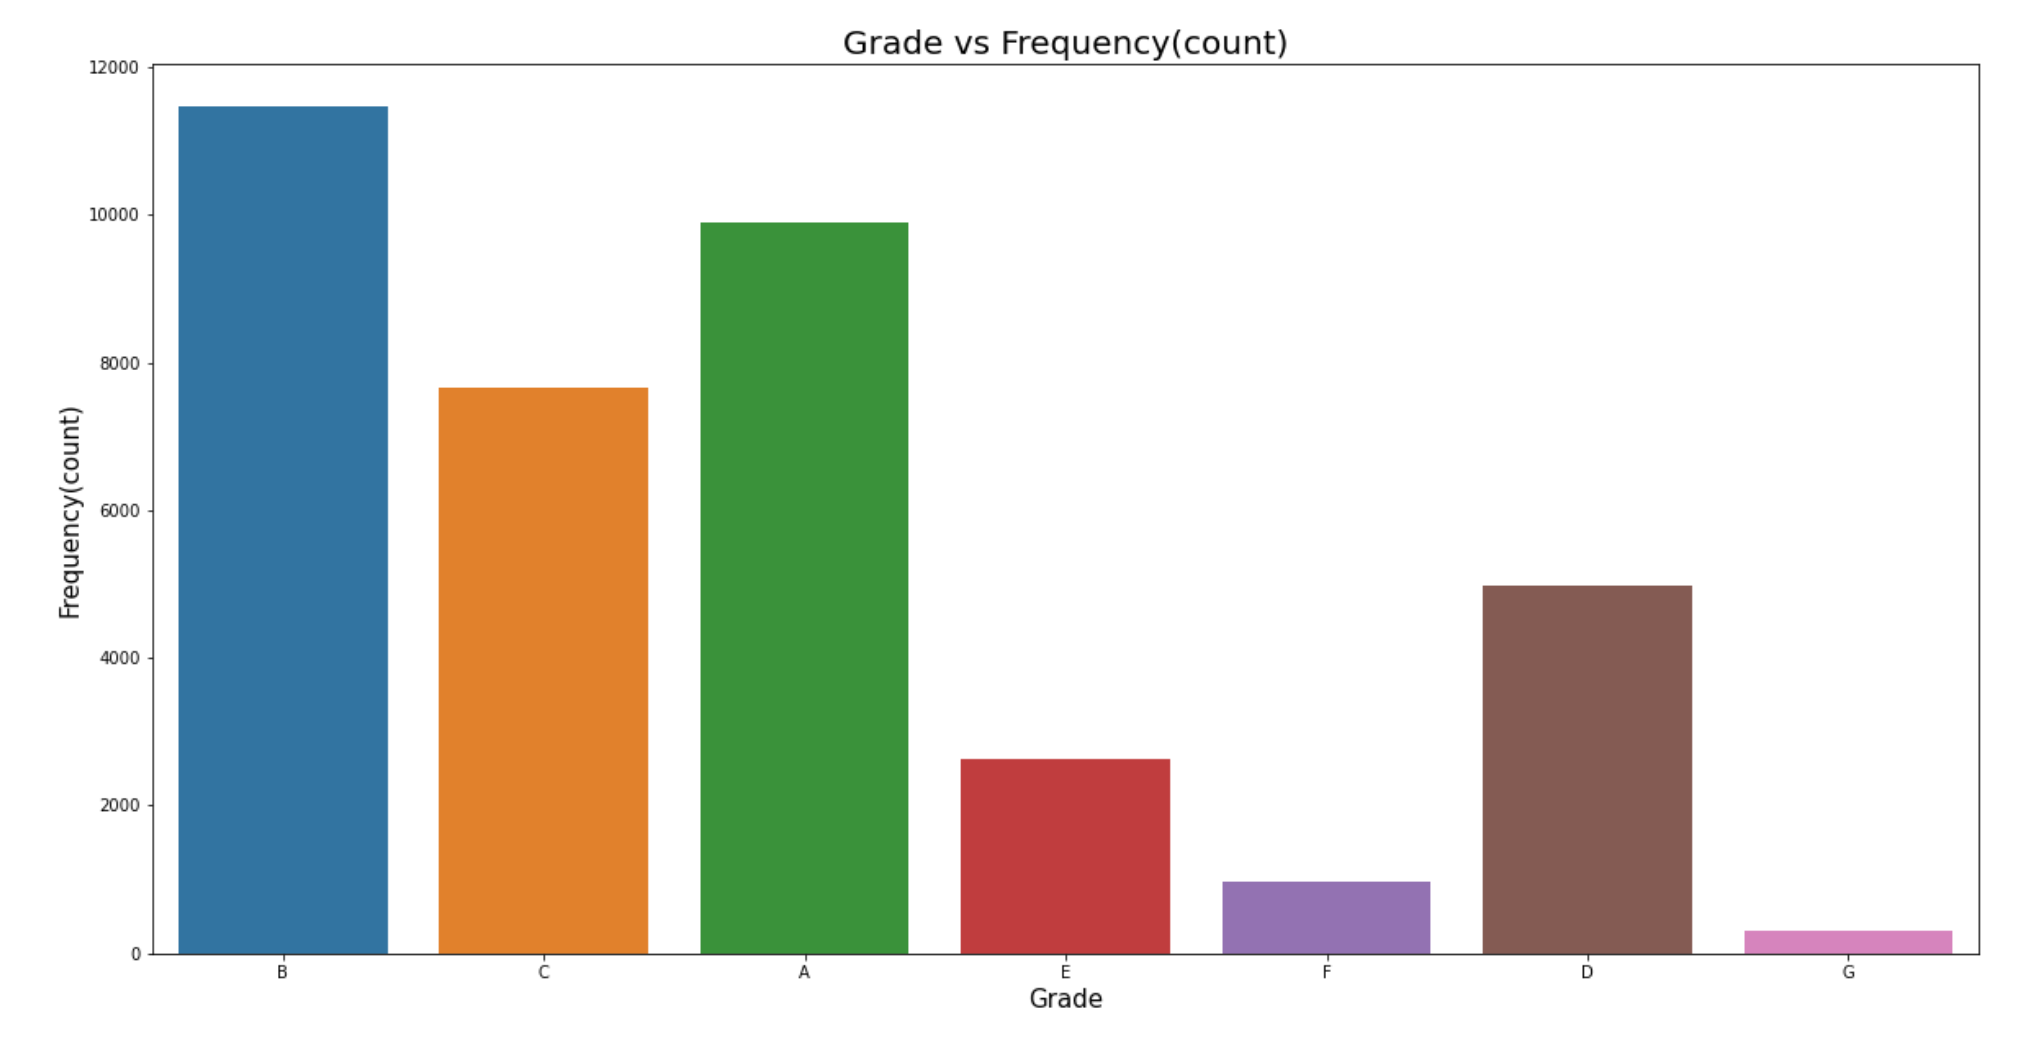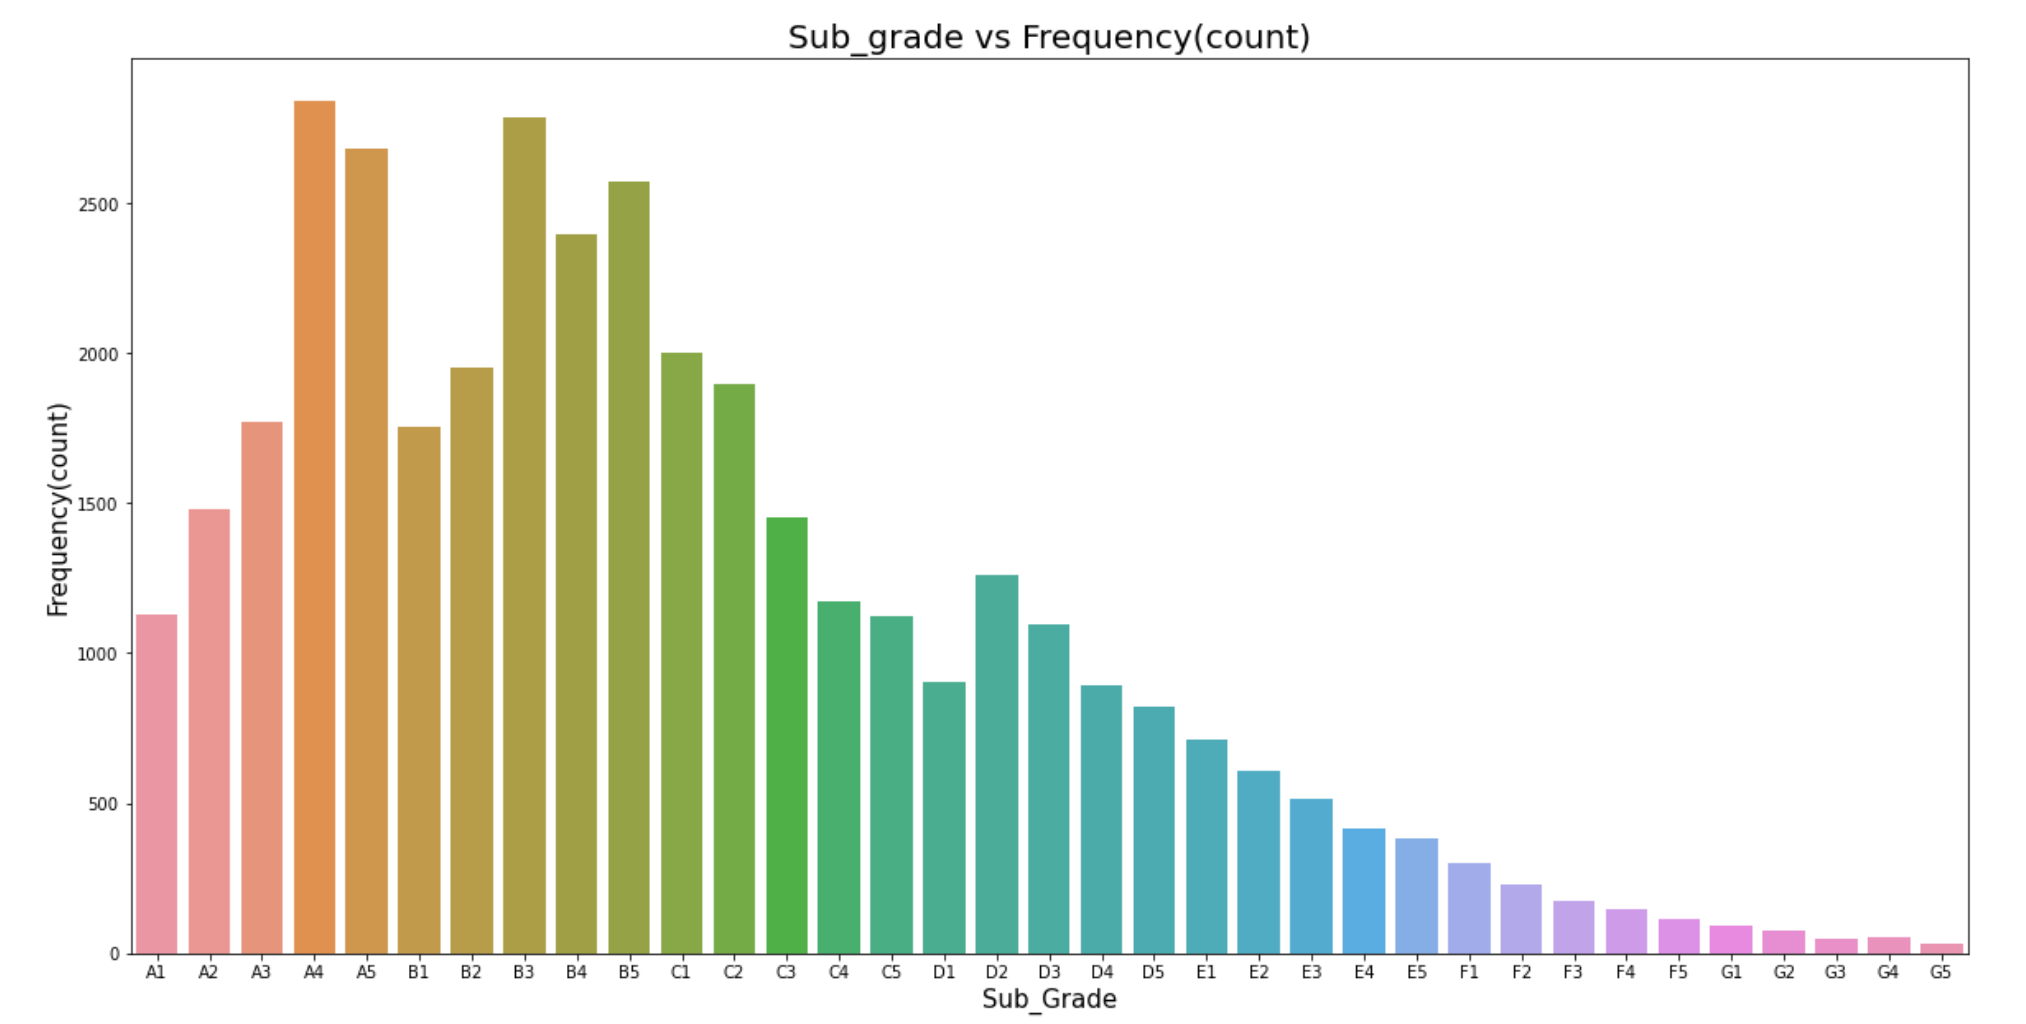

In [104]:
import seaborn as sns

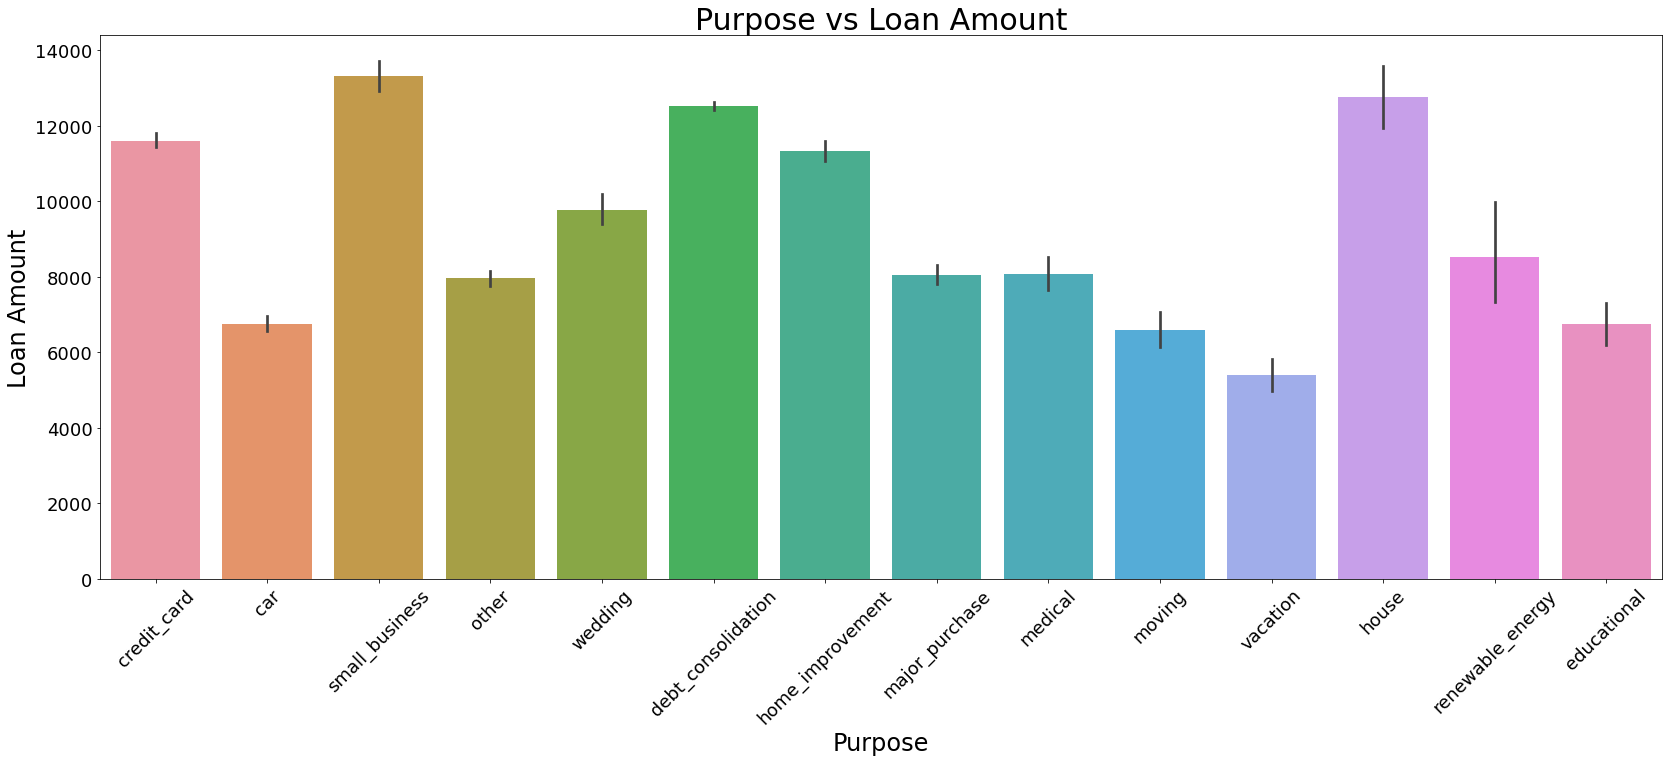

In [308]:
# Purpose vs loan_amount
plt.figure(figsize=[28,10])
sns.barplot(x="purpose", y = "loan_amnt", data=loan_df)
plt.title("Purpose vs Loan Amount", fontsize=30)
plt.xlabel("Purpose", fontsize=24)
plt.ylabel("Loan Amount", fontsize=24)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

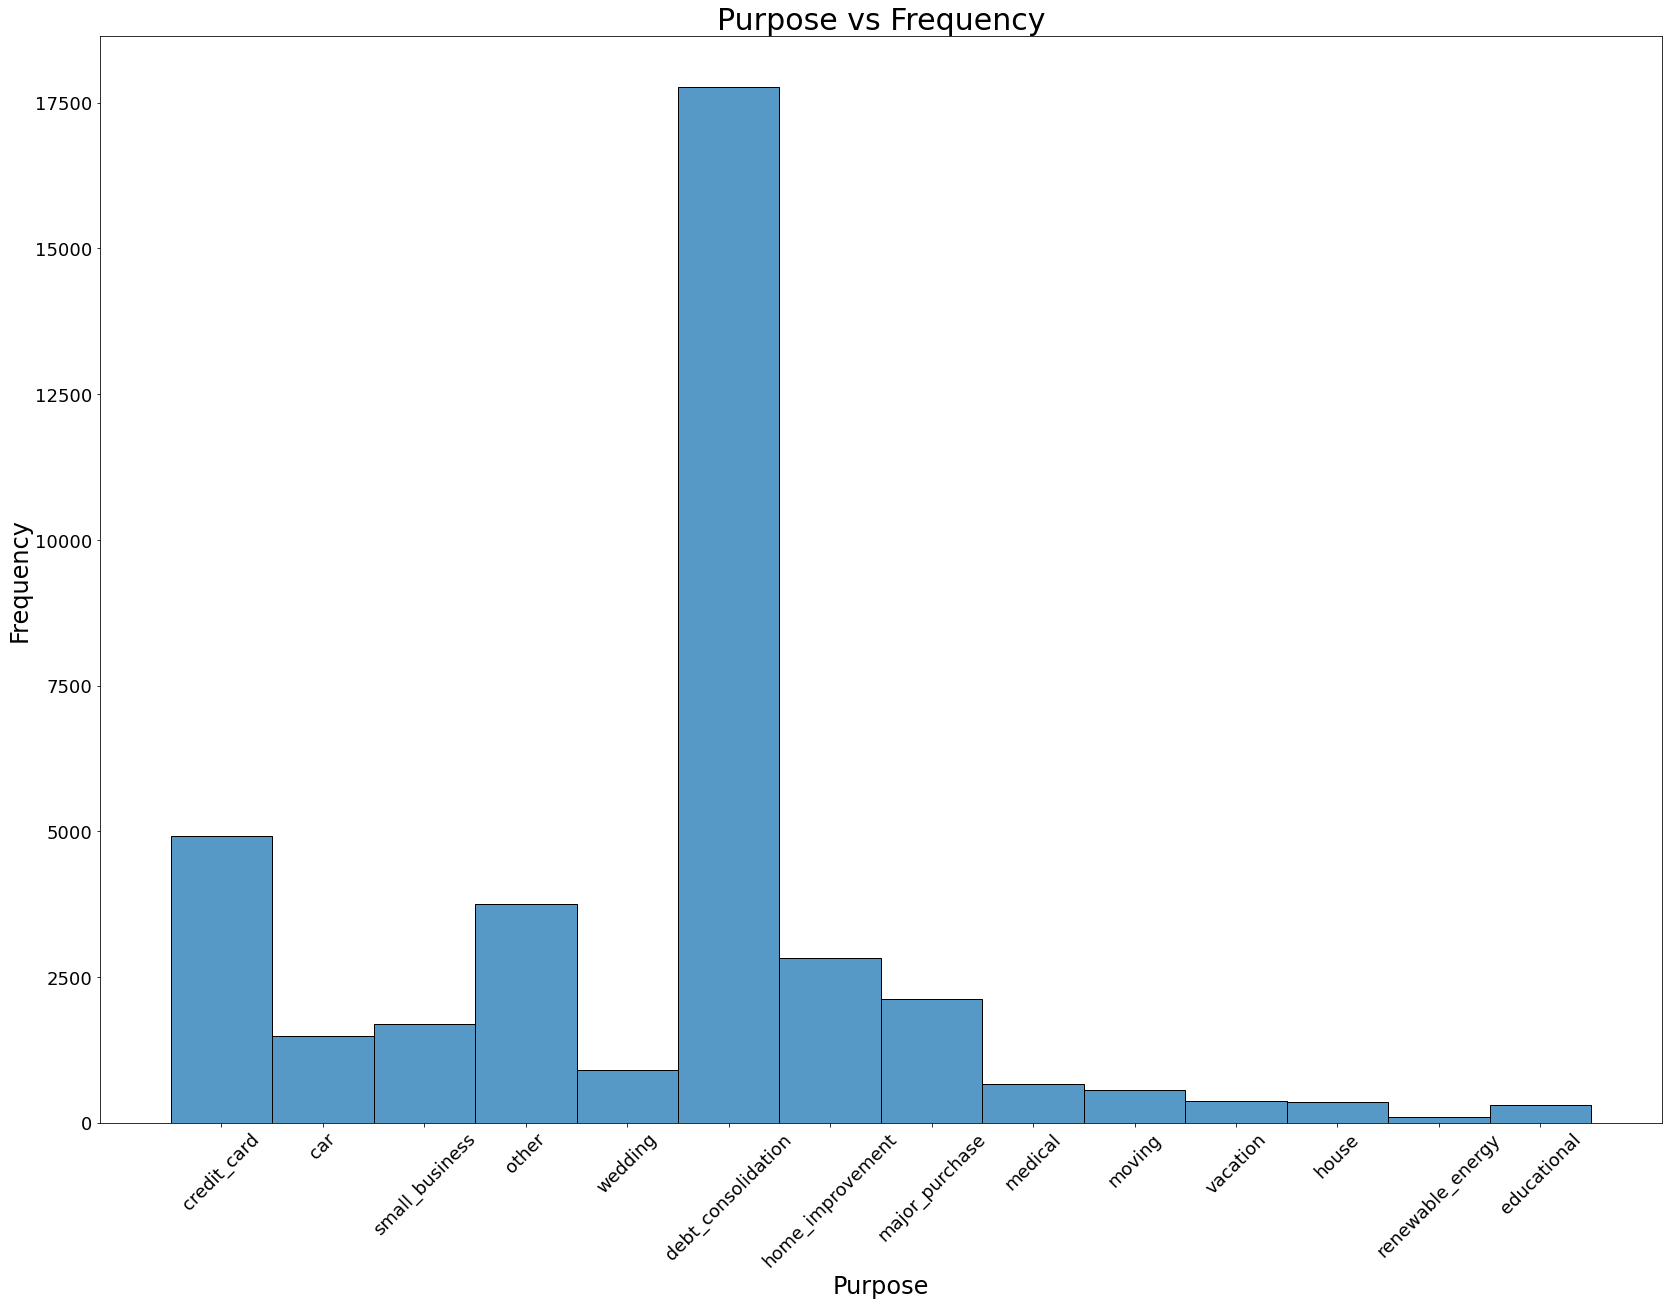

In [309]:
# Purpose vs count
plt.figure(figsize=[28,20])
sns.histplot(data=loan_df,x="purpose")
plt.title("Purpose vs Frequency", fontsize=30)
plt.xlabel("Purpose", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Text(0.5, 0.98, 'interest rate distribution')

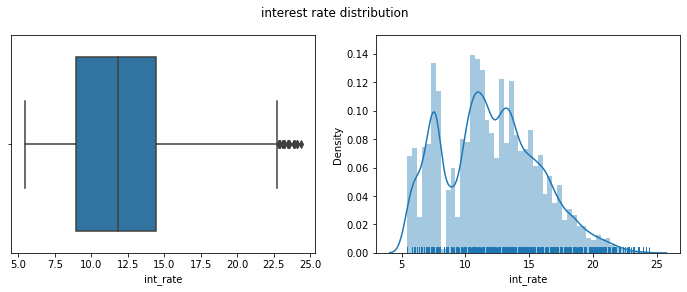

In [123]:
# Interest Rate 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x="int_rate", data=loan_df)
plt.subplot(1,2,2)
sns.distplot(a=loan_df["int_rate"], rug=True)
plt.suptitle('interest rate distribution')

Text(0.5, 1.0, 'Installment Boxplot')

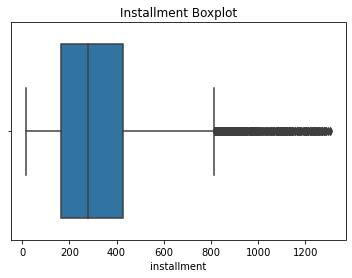

In [310]:
# monthly installment owned 
sns.boxplot(x="installment", data=loan_df)
plt.title("Installment Boxplot")

In [125]:
loan_df["installment"].describe()

count    37880.000000
mean       322.469358
std        208.620127
min         16.080000
25%        165.820000
50%        277.760000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

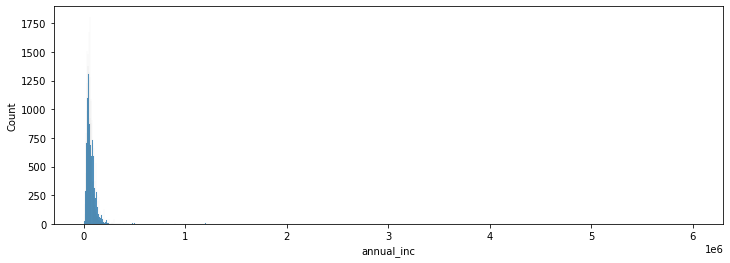

In [137]:
#Annual income of borrowers 
plt.figure(figsize=(12,4))
sns.histplot(data=loan_df, x="annual_inc")

DTI : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. 

<AxesSubplot:>

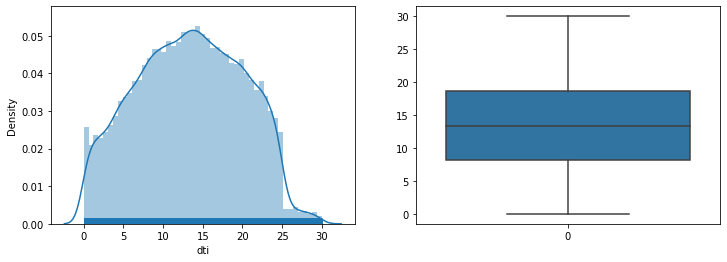

In [139]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_df["dti"], rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df["dti"])

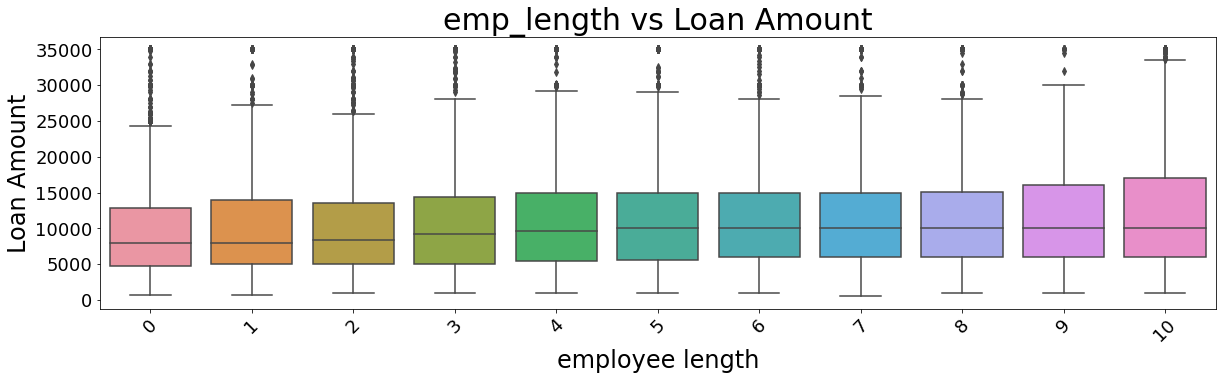

In [311]:
# Emp_length vs loan amount
plt.figure(figsize=(20,5))
sns.boxplot(x="emp_length", y=loan_df["loan_amnt"], data=loan_df) 
plt.title('emp_length vs Loan Amount', fontsize=30)
plt.xlabel("employee length", fontsize=24)
plt.ylabel("Loan Amount", fontsize=24)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.show()
# more borrowers are from 10+ years and least is <1 year

In [142]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term(in months)', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'revol_bal', 'total_acc', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt',
       'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month', 'issue_d_day',
       'earliest_cr_year', 'earliest_cr_month'],
      dtype='object')

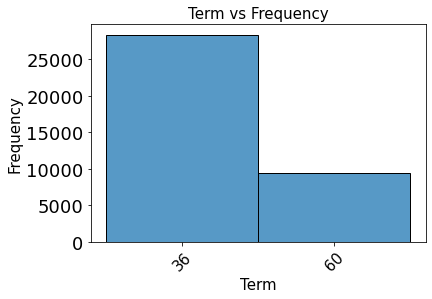

In [314]:
# Term vs Proportion 
sns.histplot(x="term(in months)", data=loan_df)
plt.title('Term vs Frequency', fontsize=15)
plt.xlabel("Term", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=18)
plt.show()

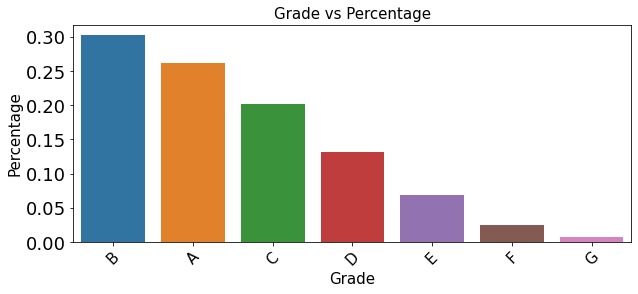

In [316]:
# Grade distribution 
#Probability / Percentage of each values
prob_df = loan_df["grade"].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x="index", y = "grade", data=prob_df) 
plt.title('Grade vs Percentage', fontsize=15)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=18)
plt.show()

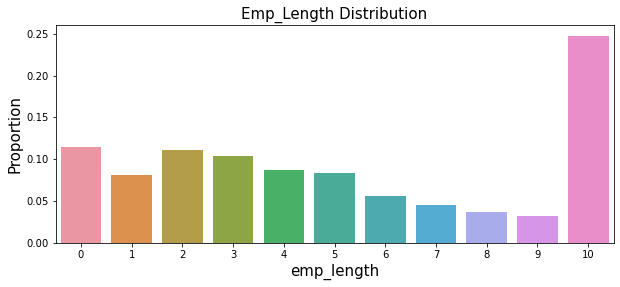

In [317]:
# Employment Length 
plt.figure(figsize=(10,4))
#Probability / Percentage of each values
prob_df = loan_df['emp_length'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y="emp_length", data=prob_df)
plt.xlabel("emp_length",fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.title("Emp_Length Distribution",fontsize=15)
plt.show()

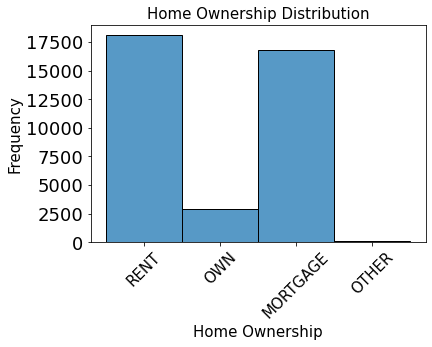

In [318]:
# Home Ownership 
sns.histplot(data = loan_df, x="home_ownership")
plt.title('Home Ownership Distribution', fontsize=15)
plt.xlabel("Home Ownership", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=18)
plt.show()

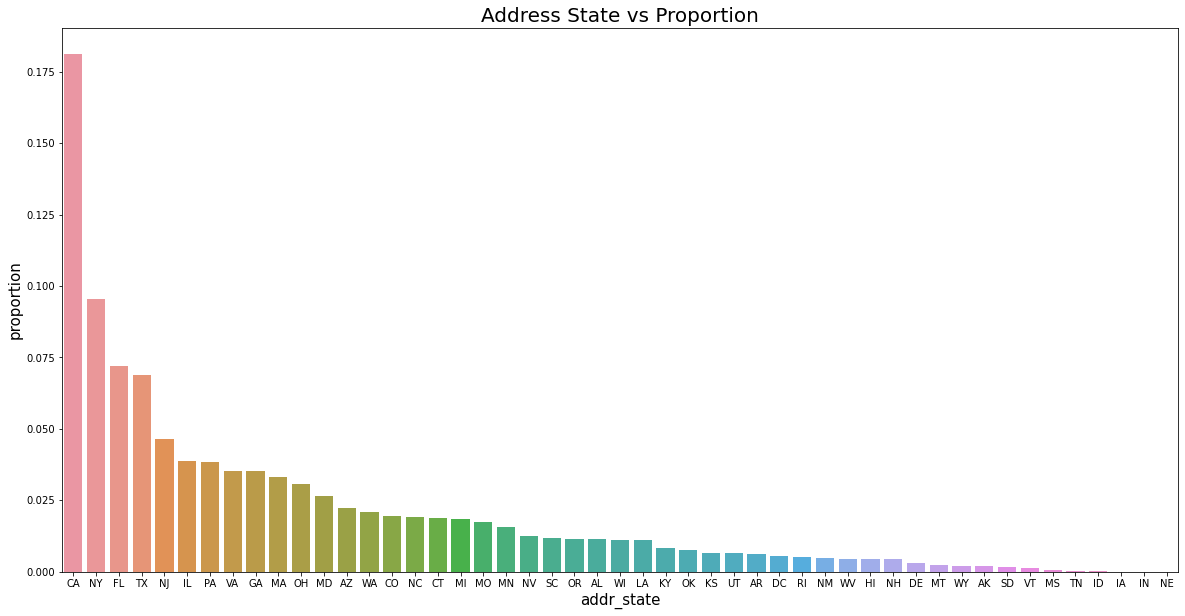

In [319]:
# Borrower state (add_state)
plt.figure(figsize=(20,10))
#Probability / Percentage of each values
prob_df = loan_df["addr_state"].value_counts(normalize=True).reset_index()
sns.barplot(x="index", y = "addr_state", data=prob_df)
plt.title("Address State vs Proportion", fontsize=20)
plt.xlabel("addr_state",fontsize=15)
plt.ylabel("proportion",fontsize=15)
plt.show()

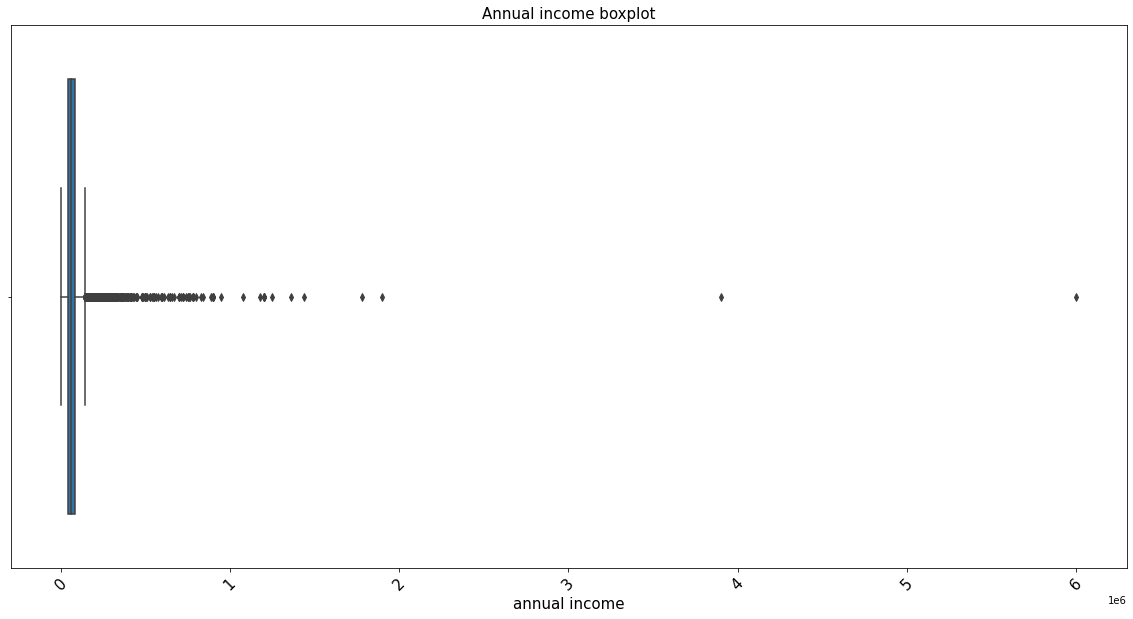

In [322]:
plt.figure(figsize=(20,10))
sns.boxplot(x="annual_inc", data=loan_df)
plt.title('Annual income boxplot', fontsize=15)
plt.xlabel("annual income", fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=18)
plt.show()

Text(0, 0.5, 'values')

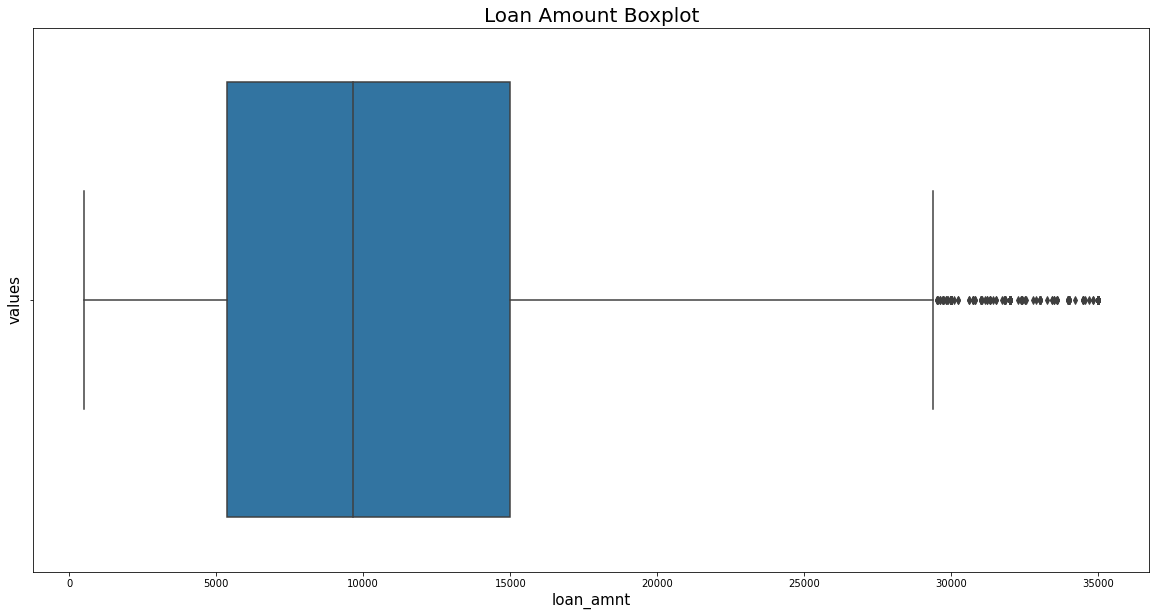

In [324]:
# annual_inc vs count
plt.figure(figsize=(20,10))
plt.title("Loan Amount Boxplot", fontsize=20)
sns.boxplot(x="loan_amnt", data=loan_df)
plt.xlabel("loan_amnt", fontsize=15)
plt.ylabel("values",fontsize=15)

In [181]:
loan_df["loan_amnt"].describe()

count    37880.000000
mean     11067.092793
std       7364.014949
min        500.000000
25%       5375.000000
50%       9637.500000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Text(0, 0.5, 'values')

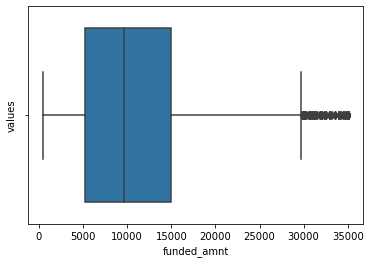

In [170]:
sns.boxplot(x="funded_amnt", data=loan_df) 
plt.xlabel("funded_amnt")
plt.ylabel("values")

Text(0, 0.5, 'values')

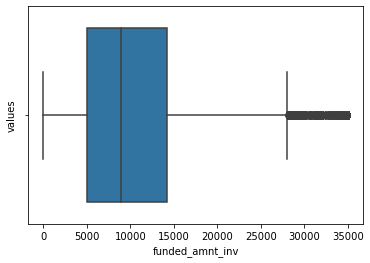

In [185]:
sns.boxplot(x="funded_amnt_inv", data=loan_df) 
plt.xlabel("funded_amnt_inv")
plt.ylabel("values")

Text(0, 0.5, 'values')

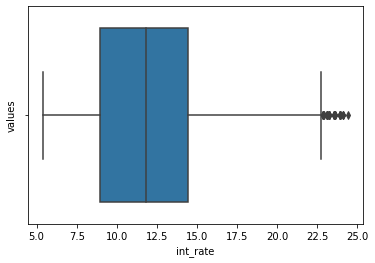

In [172]:
sns.boxplot(x="int_rate", data=loan_df)
plt.xlabel("int_rate")
plt.ylabel("values")

Text(0, 0.5, 'values')

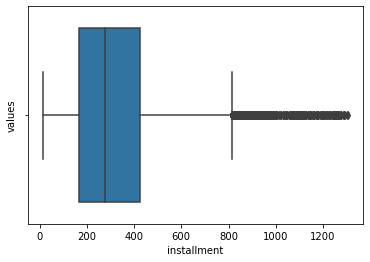

In [173]:
sns.boxplot(x="installment", data=loan_df)
plt.xlabel("installment")
plt.ylabel("values")

Text(0, 0.5, 'values')

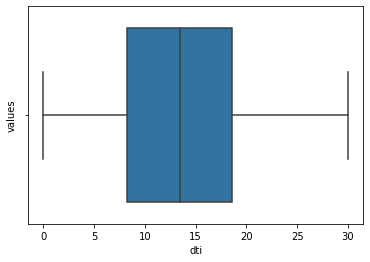

In [174]:
sns.boxplot(x="dti", data=loan_df)
plt.xlabel("dti")
plt.ylabel("values")

1. The annual_inc of most of the loan applicants is between 35,000 - 80,000 
2. The loan amount of most of the loan applicants is between 5,000 - 15,000 
3. The funded amount of most of the loan applicants is between 5,000 - 13,500 
4. The funded amount by investor for most of the loan applicants is between 5,000 - 15,000 
5. The interest rate on the loan is between 9% - 14.5%
6. The monthly installment amount on the loan is between 180 - 430
7. The debt to income ration is between 8 - 18

Text(0, 0.5, 'Frequency(count)')

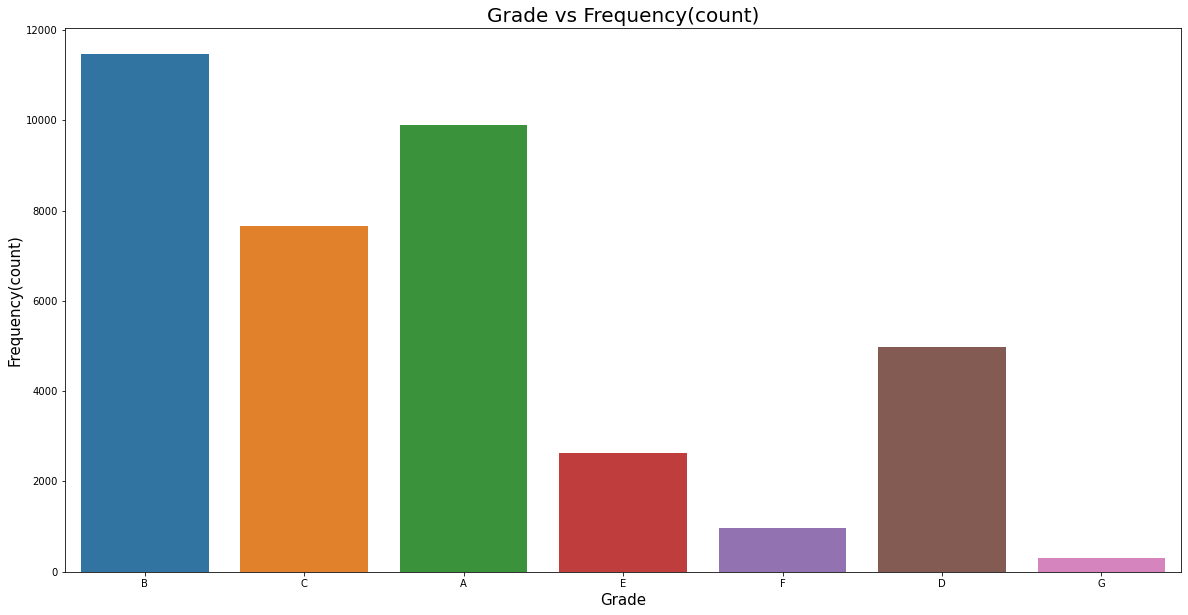

In [327]:
# Grade vs Count 
plt.figure(figsize=(20,10))
sns.countplot(x="grade",data=loan_df)
plt.title("Grade vs Frequency(count)",fontsize=20)
plt.xlabel("Grade",fontsize=15)
plt.ylabel("Frequency(count)",fontsize=15)

Text(0, 0.5, 'Frequency(count)')

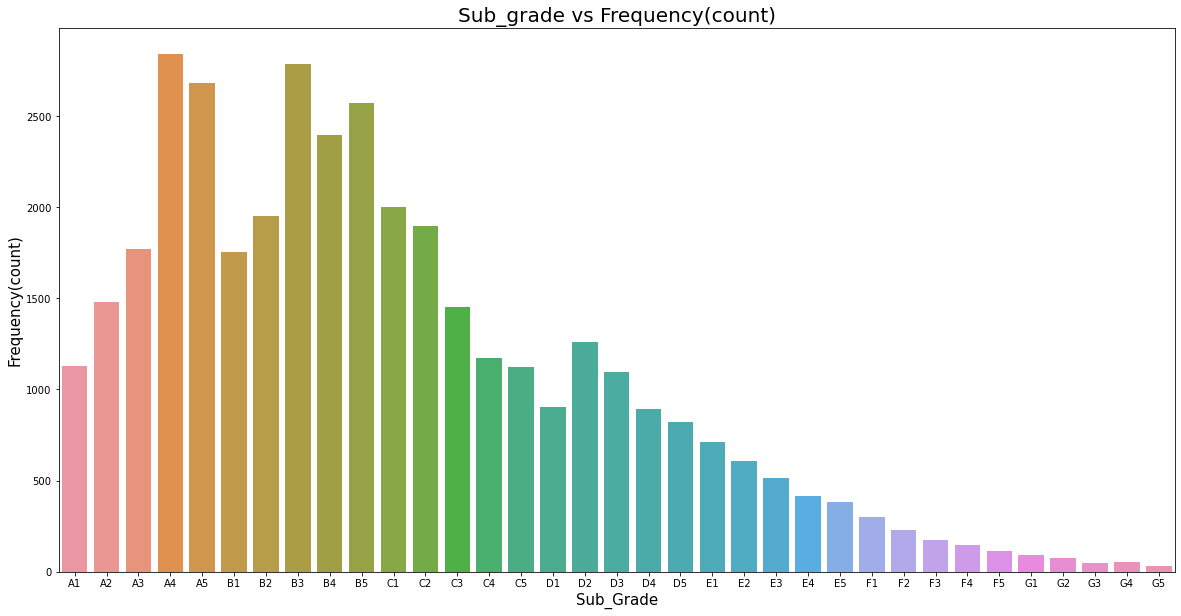

In [381]:
# Subgrade vs count
sorted_sub_grades = sorted(loan_df["sub_grade"].unique())
plt.figure(figsize=(20,10))
sns.countplot(x="sub_grade", data=loan_df, order=sorted_sub_grades)
plt.title("Sub_grade vs Frequency(count)", fontsize=20)
plt.xlabel("Sub_Grade",fontsize=15)
plt.ylabel("Frequency(count)",fontsize=15)

Text(0, 0.5, 'Frequency(count)')

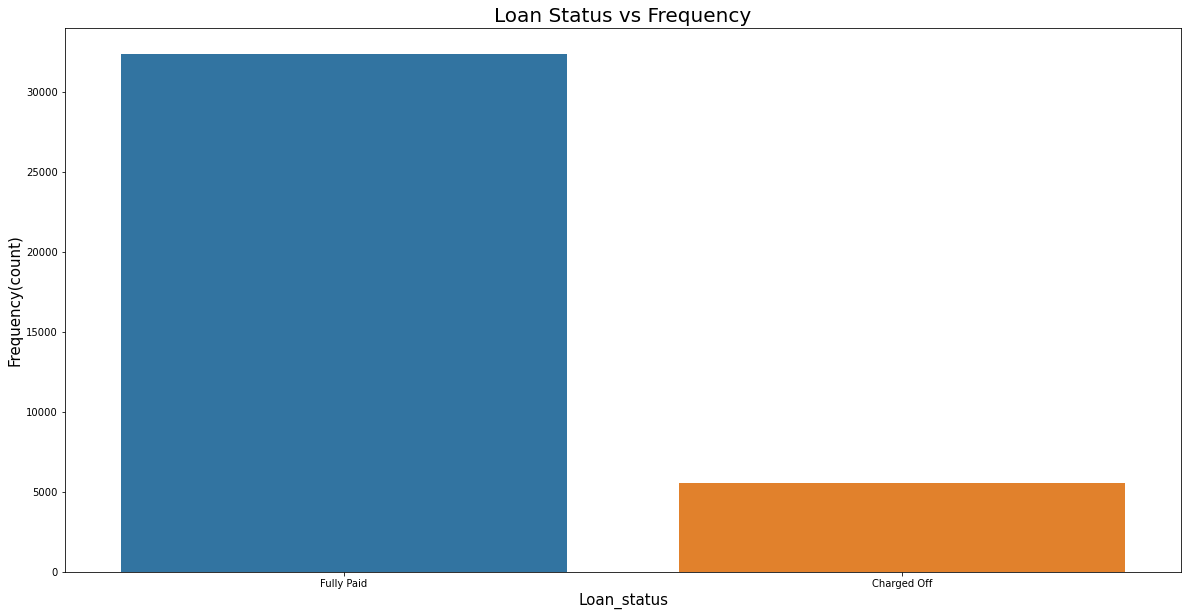

In [330]:
plt.figure(figsize=(20,10))
sns.countplot(x="loan_status",data=loan_df)
plt.title("Loan Status vs Frequency",fontsize=20)
plt.xlabel("Loan_status",fontsize=15)
plt.ylabel("Frequency(count)",fontsize=15)

Text(0, 0.5, 'Frequency(count)')

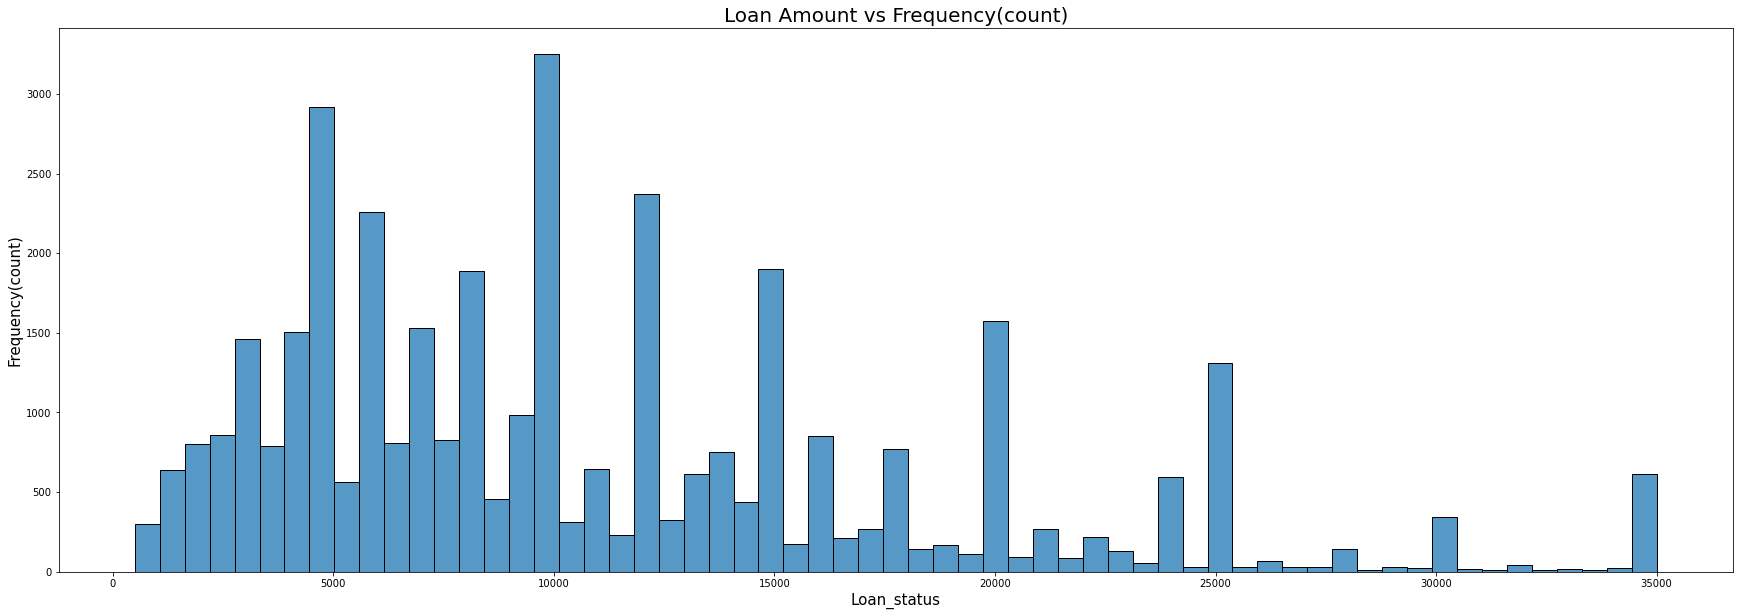

In [333]:
# loan_amount frequency 
sorted_loan_amnt = sorted(loan_df["loan_amnt"].unique())
plt.figure(figsize=(30,10))
sns.histplot(x="loan_amnt",data=loan_df,palette="pastel")
plt.title("Loan Amount vs Frequency(count)",fontsize=20)
plt.xlabel("Loan_status",fontsize=15)
plt.ylabel("Frequency(count)",fontsize=15)

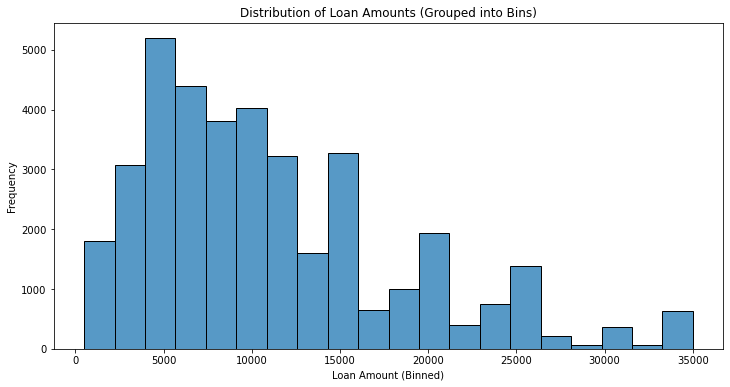

In [211]:
plt.figure(figsize=(12, 6))
sns.histplot(x="loan_amnt", data=loan_df, bins=20, kde=False)  # Adjust bins as needed
plt.xlabel("Loan Amount (Binned)")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Amounts (Grouped into Bins)")
plt.show()

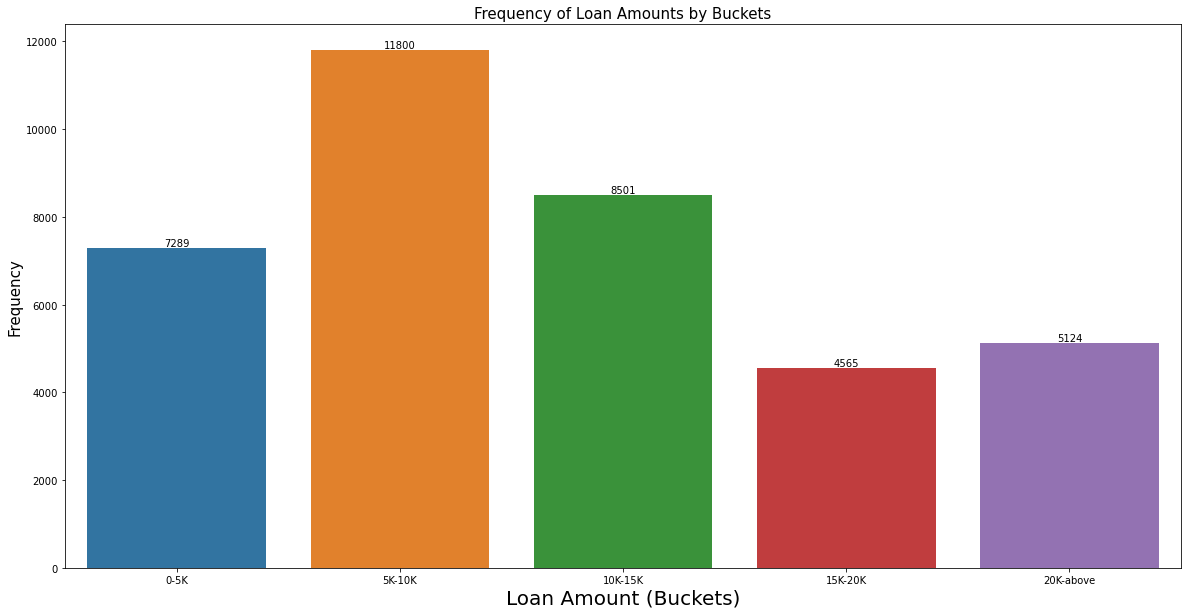

In [334]:
# Define buckets for loan amounts
bins = [0, 5000, 10000, 15000, 20000, 35000]
labels = ["0-5K", "5K-10K", "10K-15K", "15K-20K", "20K-above"]

# Create a new column for loan amount buckets
loan_df['loan_amnt_bucket'] = pd.cut(loan_df['loan_amnt'], bins=bins, labels=labels, right=False)

# Plot the frequency of each bucket
plt.figure(figsize=(20, 10))
sns.countplot(x='loan_amnt_bucket', data=loan_df, order=labels)

# annotations to show counts on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)

# Customizing the plot
plt.xlabel("Loan Amount (Buckets)",fontsize=20)
plt.ylabel("Frequency",fontsize=15)
plt.title("Frequency of Loan Amounts by Buckets",fontsize=15)
plt.show()


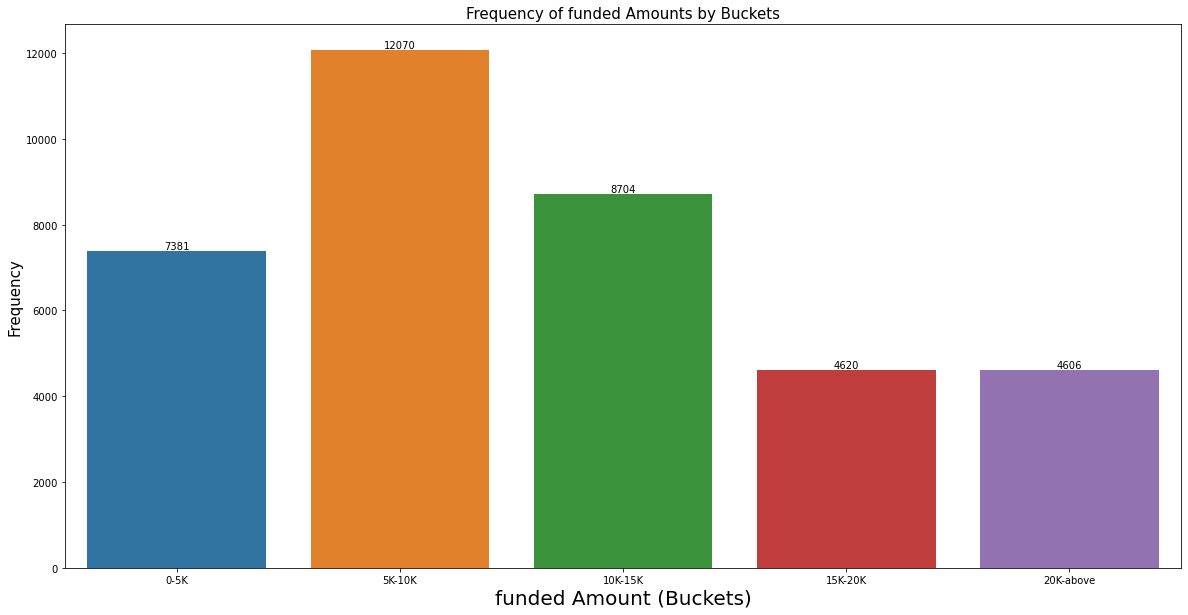

In [335]:
# Define buckets for loan amounts
bins = [0, 5000, 10000, 15000, 20000, 35000]
labels = ["0-5K", "5K-10K", "10K-15K", "15K-20K", "20K-above"]

# Create a new column for loan amount buckets
loan_df['funded_amnt_bucket'] = pd.cut(loan_df['funded_amnt'], bins=bins, labels=labels, right=False)

# Plot the frequency of each bucket
plt.figure(figsize=(20, 10))
sns.countplot(x='funded_amnt_bucket', data=loan_df, order=labels)

# annotations to show counts on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)

# Customizing the plot
plt.xlabel("funded Amount (Buckets)",fontsize=20)
plt.ylabel("Frequency",fontsize=15)
plt.title("Frequency of funded Amounts by Buckets",fontsize=15)
plt.show()


# Segmented Univariate Analysis

### Segmented univariate analysis involves analyzing a single variable within the context of one or more segments or groups defined by another variable. The goal is to observe how the distribution, central tendency, or variability of the primary variable changes across different segments.

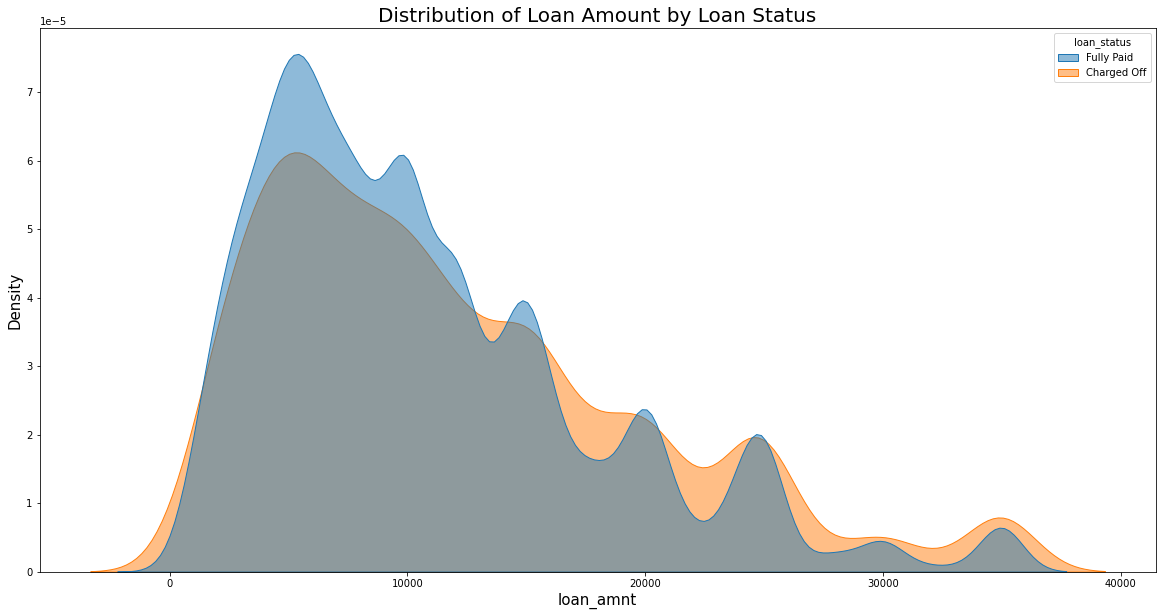

In [340]:
# Loan Amount Distribution Segmented by Loan Status 
plt.figure(figsize=(20, 10))
sns.kdeplot(data=loan_df, x='loan_amnt', hue='loan_status', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribution of Loan Amount by Loan Status',fontsize=20)
plt.xlabel("loan_amnt",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

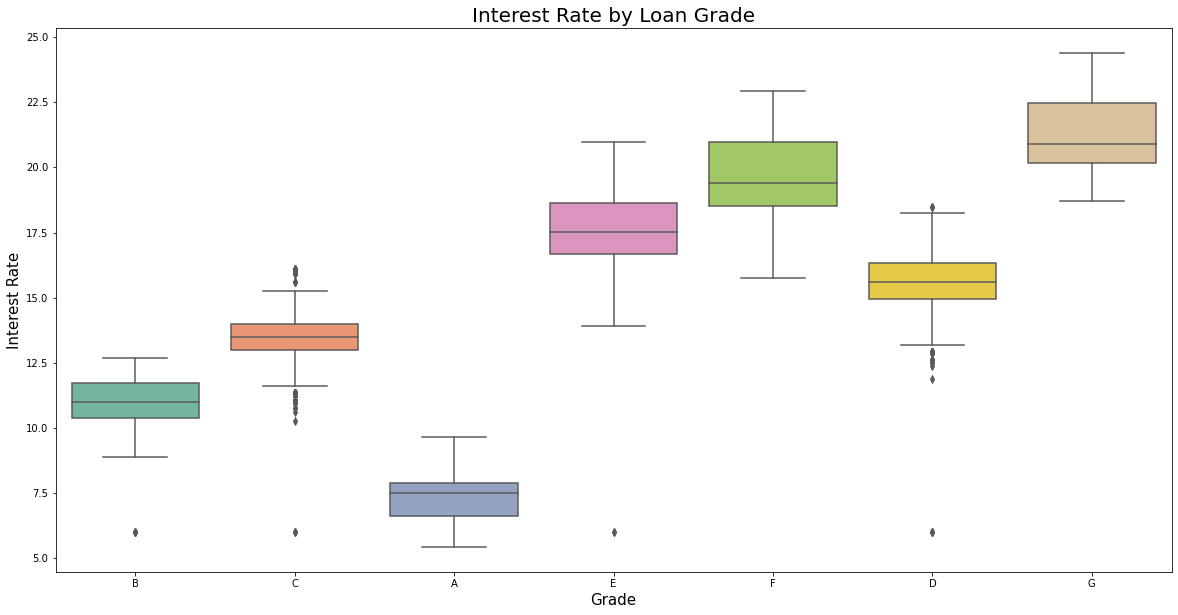

In [341]:
# Interest Rate Distribution Segmented by Grade
plt.figure(figsize=(20, 10))
sns.boxplot(data=loan_df, x='grade', y='int_rate', palette='Set2')
plt.title('Interest Rate by Loan Grade',fontsize=20)
plt.xlabel("Grade",fontsize=15)
plt.ylabel("Interest Rate",fontsize=15)
plt.show()

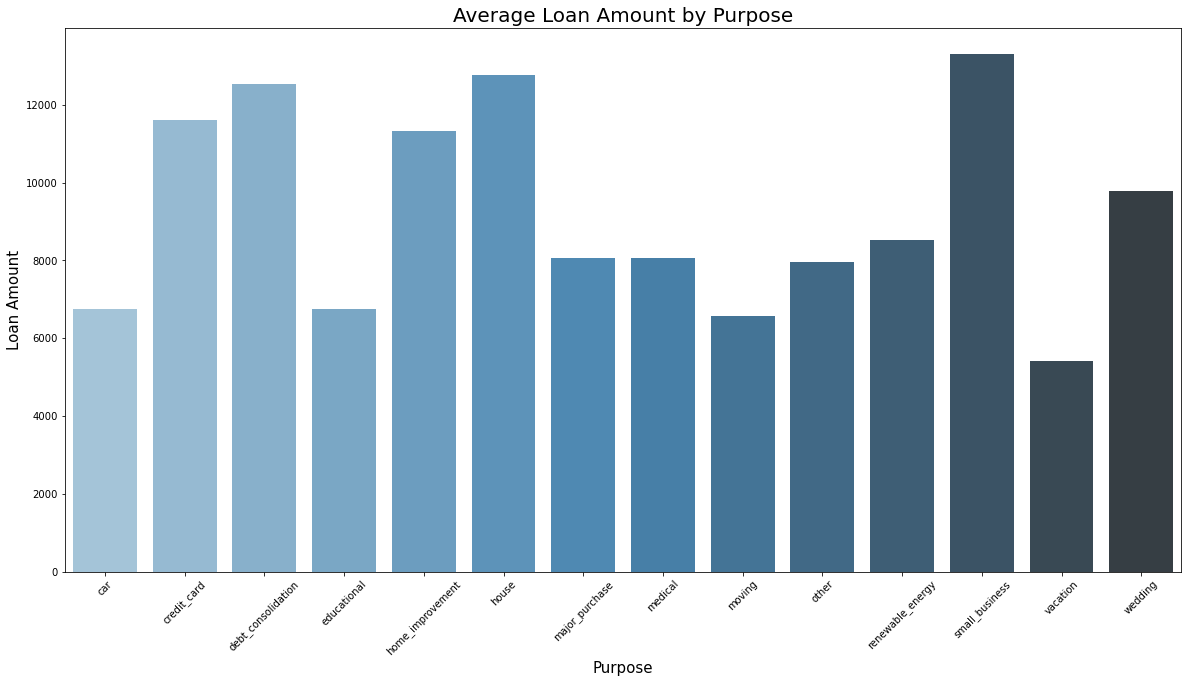

In [343]:
# Loan Amount Segmented by Purpose
plt.figure(figsize=(20, 10))
loan_purpose_means = loan_df.groupby('purpose')['loan_amnt'].mean().reset_index()
sns.barplot(data=loan_purpose_means, x='purpose', y='loan_amnt', palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Average Loan Amount by Purpose',fontsize=20)
plt.xlabel("Purpose",fontsize=15)
plt.ylabel("Loan Amount",fontsize=15)
plt.show()

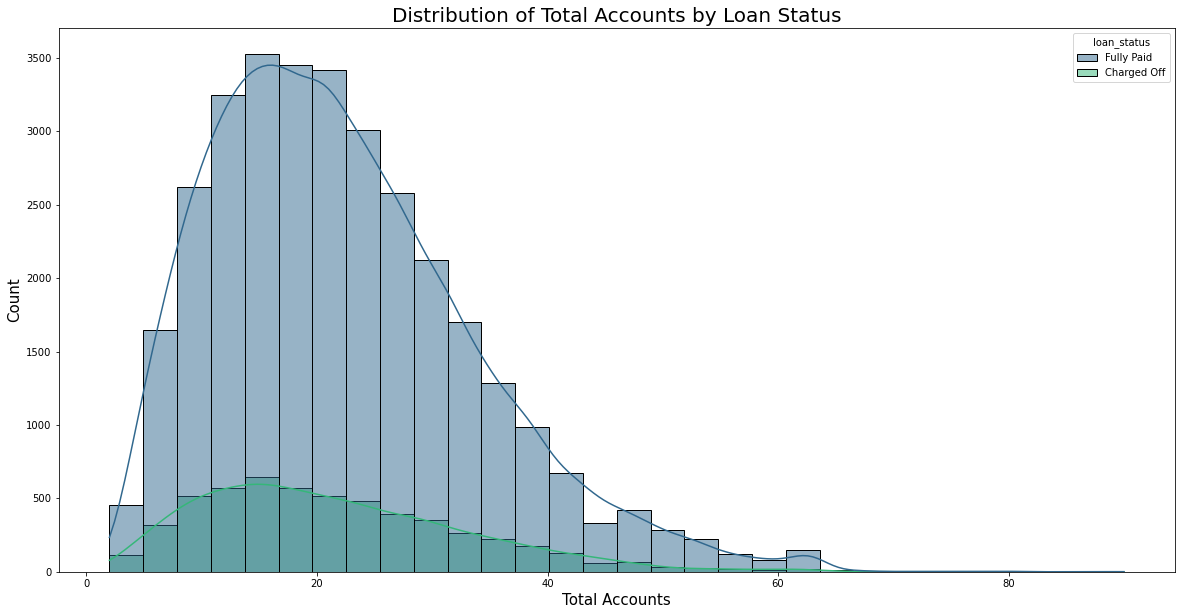

In [345]:
#  Number of Accounts Segmented by Loan Status
plt.figure(figsize=(20, 10))
sns.histplot(data=loan_df, x='total_acc', hue='loan_status', kde=True, bins=30, palette='viridis')
plt.title('Distribution of Total Accounts by Loan Status',fontsize=20)
plt.xlabel("Total Accounts",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

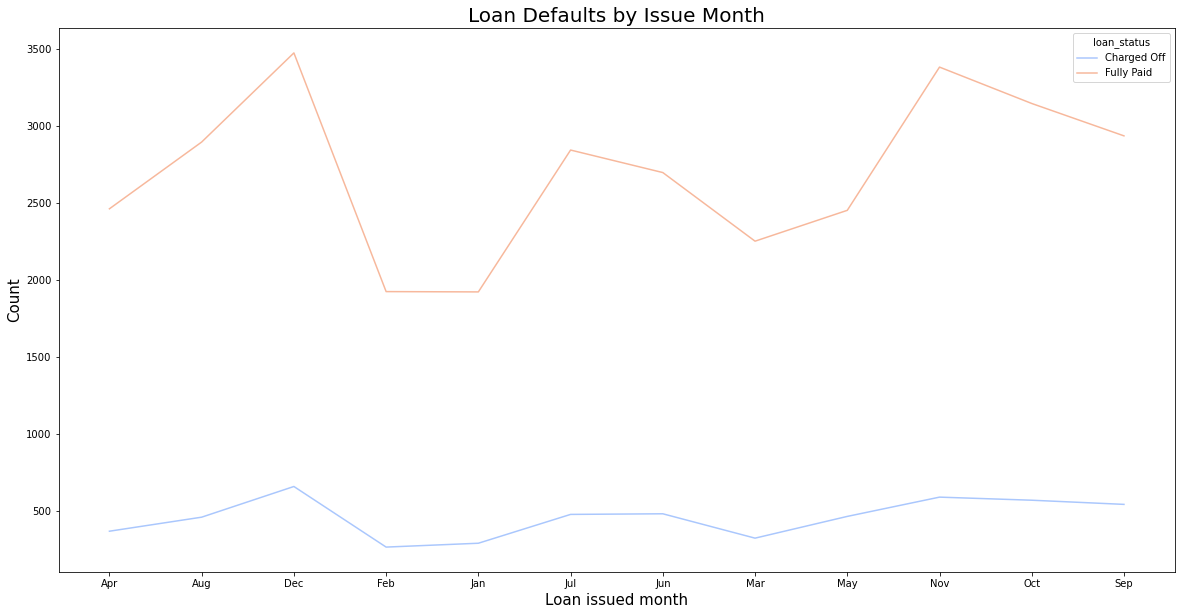

In [346]:
#  Issue Month Segmented by Loan Status
plt.figure(figsize=(20, 10))
issue_month_default = loan_df.groupby(['issue_d_month', 'loan_status']).size().reset_index(name='count')
sns.lineplot(data=issue_month_default, x='issue_d_month', y='count', hue='loan_status', palette='coolwarm')
plt.title('Loan Defaults by Issue Month',fontsize=20)
plt.xlabel("Loan issued month",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

# Bivariate Analysis

### Bivariate analysis examines the relationship between two variables to identify patterns, associations, or dependencies. It helps answer questions about how one variable changes in relation to another.

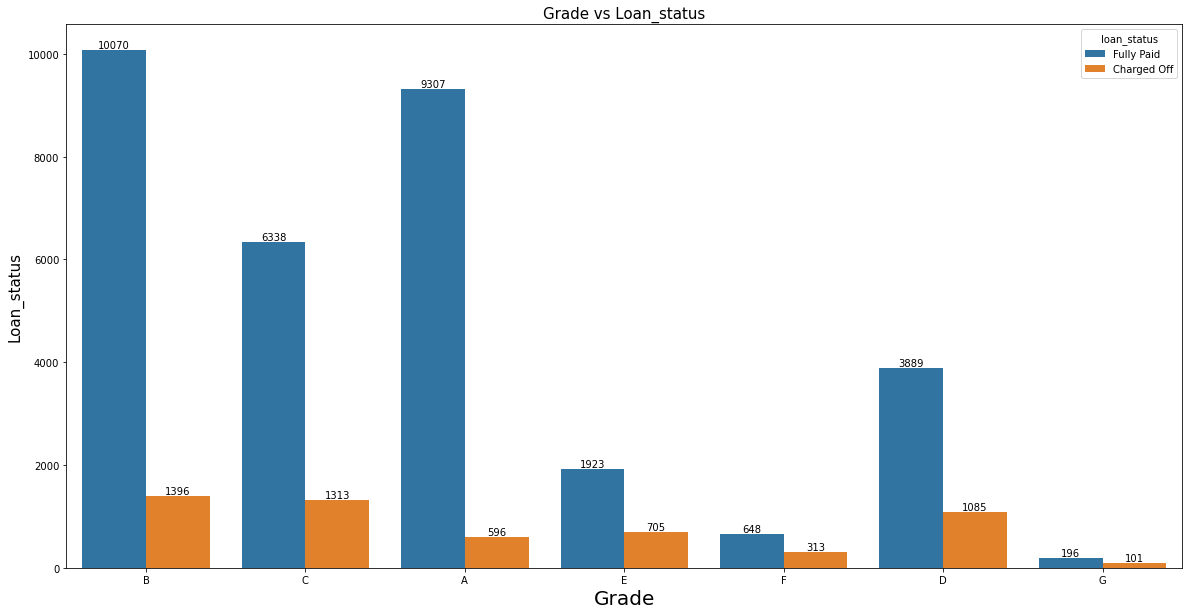

In [350]:
# grade vs loan_status
plt.figure(figsize=(20, 10))
sns.countplot(x="grade", hue = "loan_status", data=loan_df)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)
plt.xlabel("Grade",fontsize=20)
plt.ylabel("Loan_status",fontsize=15)
plt.title("Grade vs Loan_status",fontsize=15)
plt.show()

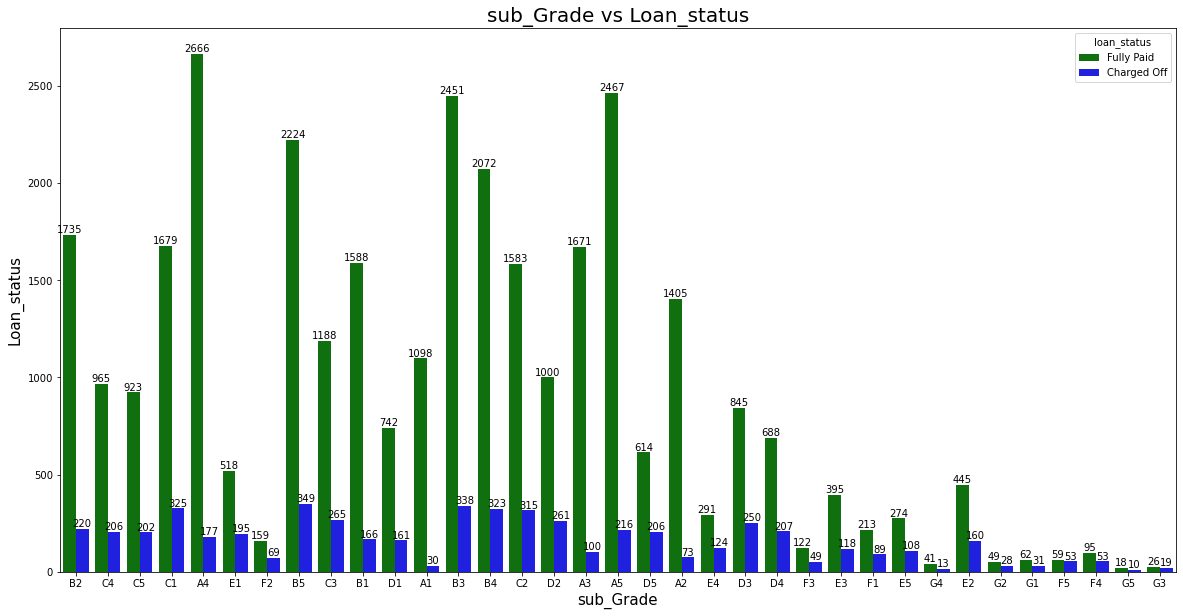

In [351]:
# sub_grade vs loan_status
plt.figure(figsize=(20, 10))
sns.countplot(x="sub_grade", hue = "loan_status", data=loan_df,dodge=0.5, 
             palette={"Fully Paid": "green", "Charged Off": "blue"})

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)
plt.xlabel("sub_Grade",fontsize=15)
plt.ylabel("Loan_status",fontsize=15)
plt.title("sub_Grade vs Loan_status",fontsize=20)
plt.show()

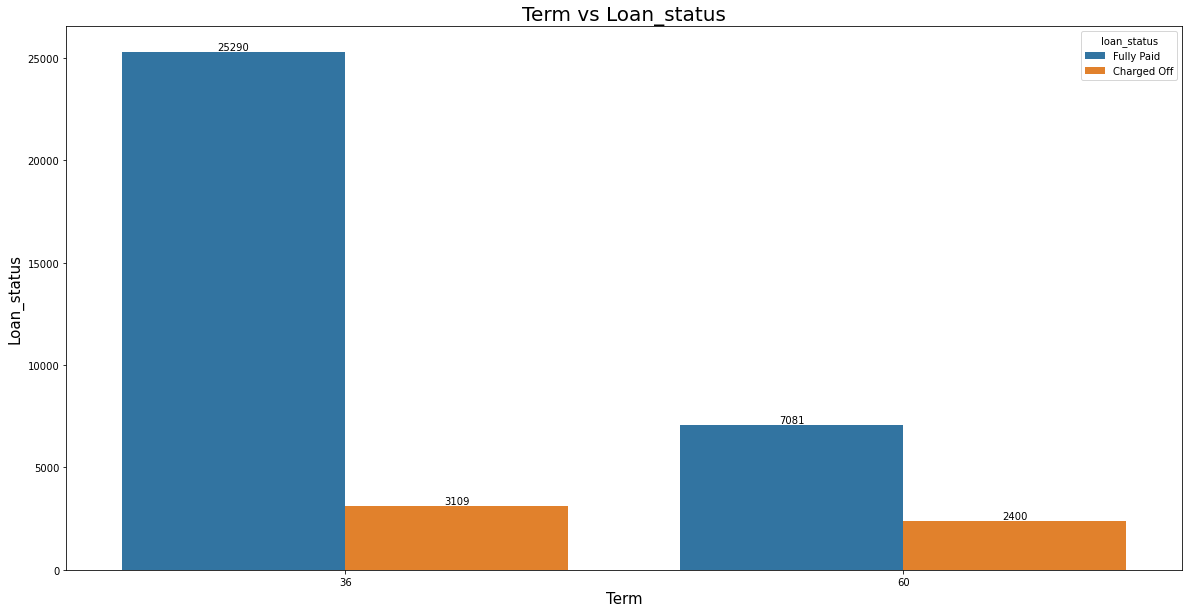

In [352]:
# Term vs Loan_status
plt.figure(figsize=(20, 10))
sns.countplot(x="term(in months)", hue="loan_status", data=loan_df)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)
plt.xlabel("Term",fontsize=15)
plt.ylabel("Loan_status",fontsize=15)
plt.title("Term vs Loan_status",fontsize=20)
plt.show()

In [246]:
loan_df.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0  1077501    1296599       5000         5000           4975.0   
1  1077430    1314167       2500         2500           2500.0   
2  1077175    1313524       2400         2400           2400.0   

  term(in months)  int_rate  installment grade sub_grade  emp_length  \
0              36     10.65       162.87     B        B2          10   
1              60     15.27        59.83     C        C4           0   
2              36     15.96        84.33     C        C5          10   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0            Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   

          purpose addr_state    dti earliest_cr_line  revol_bal  total_acc  \
0     credit_card         AZ  27.65       1985-01-01      13648          9   
1             car         GA   1.00       1999-04-01       1687          4   
2  small_business         IL   8.72       2001-11-01       2956         10   

   total_rec_prncp  total_rec_int  total_rec_late_fee  last_pymnt_amnt  \
0          5000.00         863.16                 0.0           171.62   
1           456.46         435.17                 0.0           119.66   
2          2400.00         605.67                 0.0           649.91   

   pub_rec_bankruptcies issue_d_year issue_d_month issue_d_day  \
0                   0.0         2011           Dec           1   
1                   0.0         2011           Dec           1   
2                   0.0         2011           Dec           1   

  earliest_cr_year earliest_cr_month loan_amnt_bucket int_rate_bucket  \
0             1985               Jan           5K-10K          9%-13%   
1             1999               Apr             0-5K         13%-17%   
2             2001               Nov             0-5K         13%-17%   

  funded_amnt_bucket  
0             5K-10K  
1               0-5K  
2               0-5K

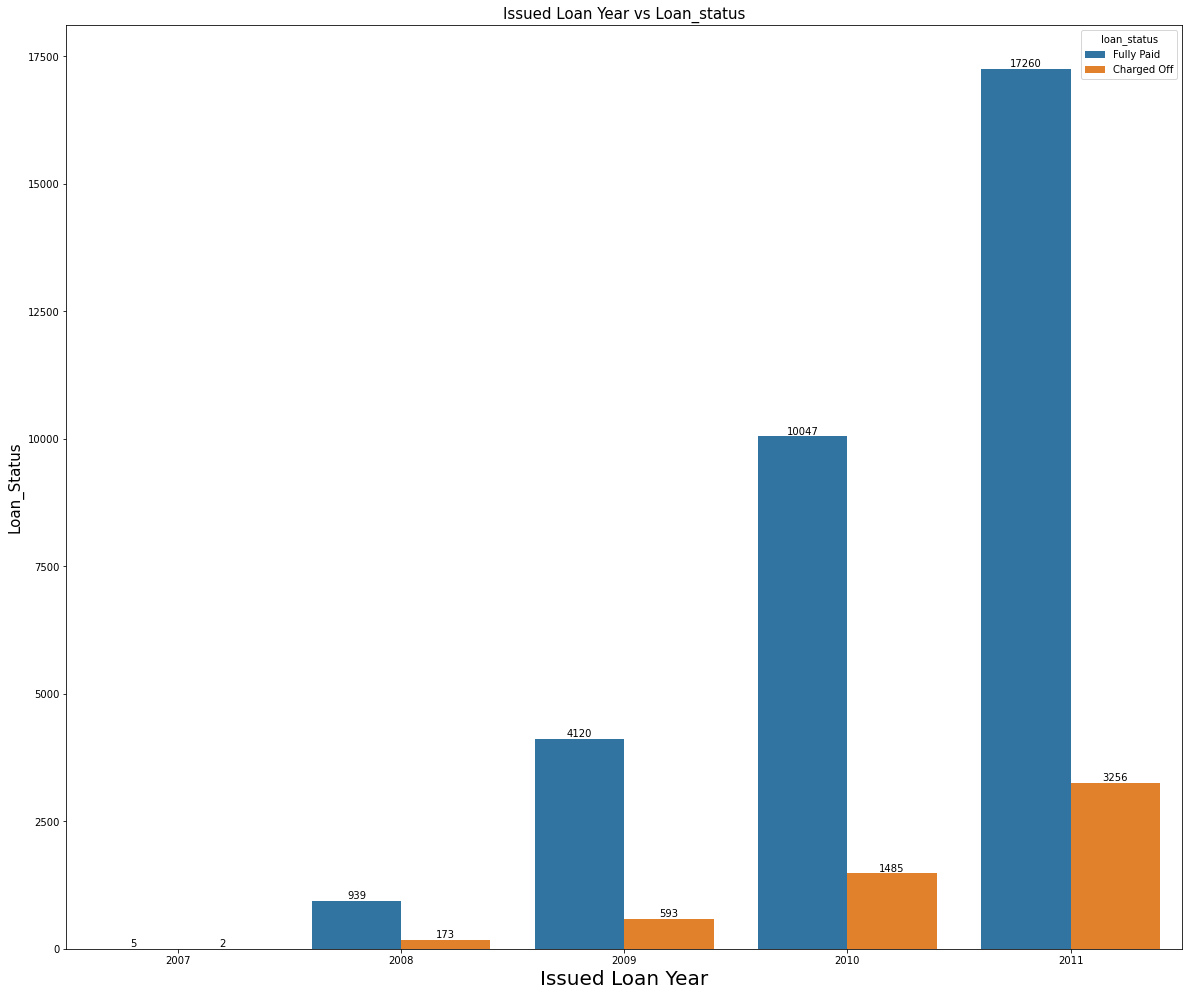

In [353]:
# Loan Year vs loan status
plt.figure(figsize=(20, 17))
sns.countplot(x="issue_d_year", hue="loan_status", data=loan_df)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)
plt.xlabel("Issued Loan Year",fontsize=20)
plt.ylabel("Loan_Status",fontsize=15)
plt.title("Issued Loan Year vs Loan_status",fontsize=15)
plt.show()

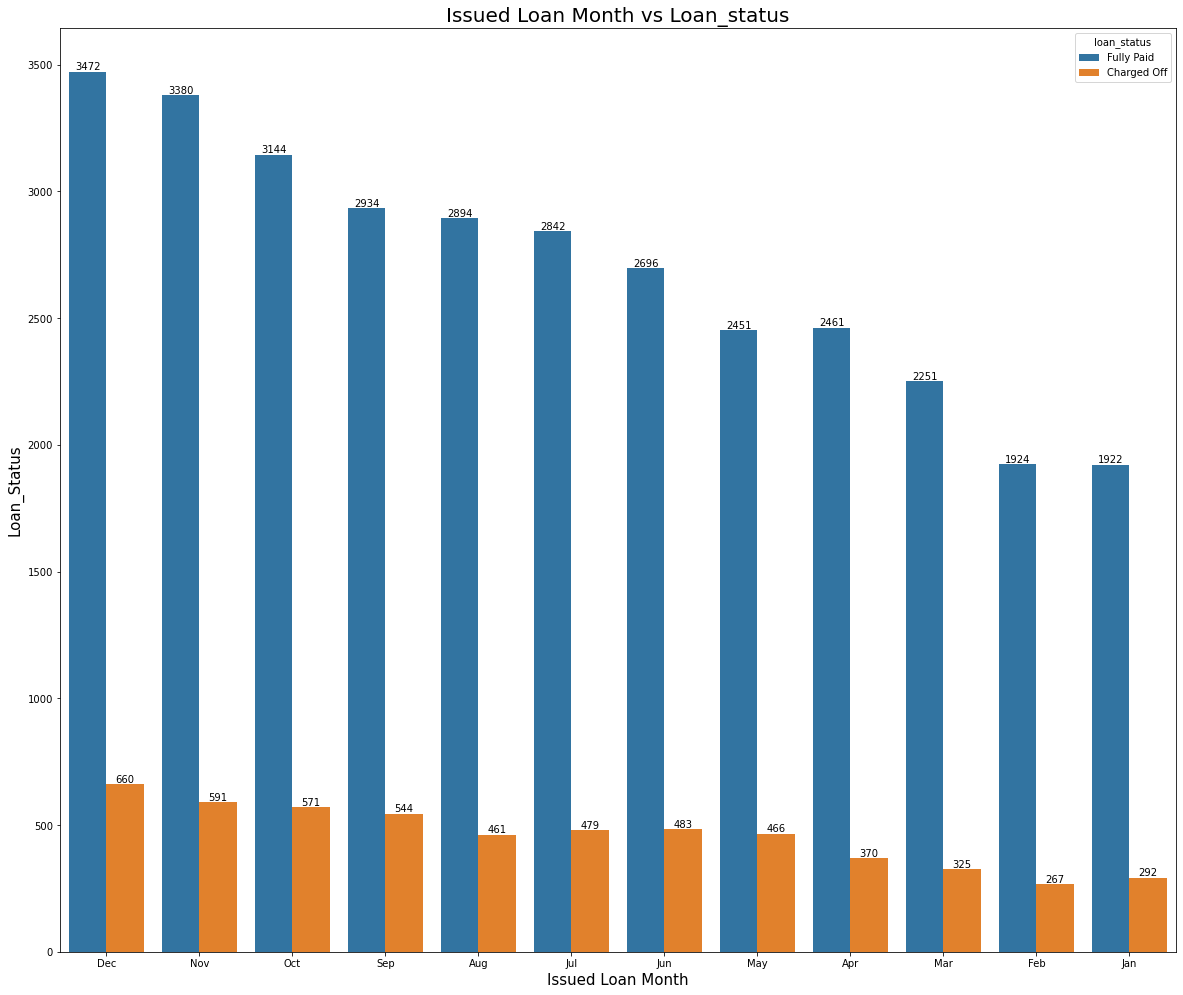

In [354]:
# Loan Month vs Loan Status

# Loan Year vs loan status
plt.figure(figsize=(20, 17))
sns.countplot(x="issue_d_month", hue="loan_status", data=loan_df)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)
plt.xlabel("Issued Loan Month",fontsize=15)
plt.ylabel("Loan_Status", fontsize=15)
plt.title("Issued Loan Month vs Loan_status", fontsize=20)
plt.show()

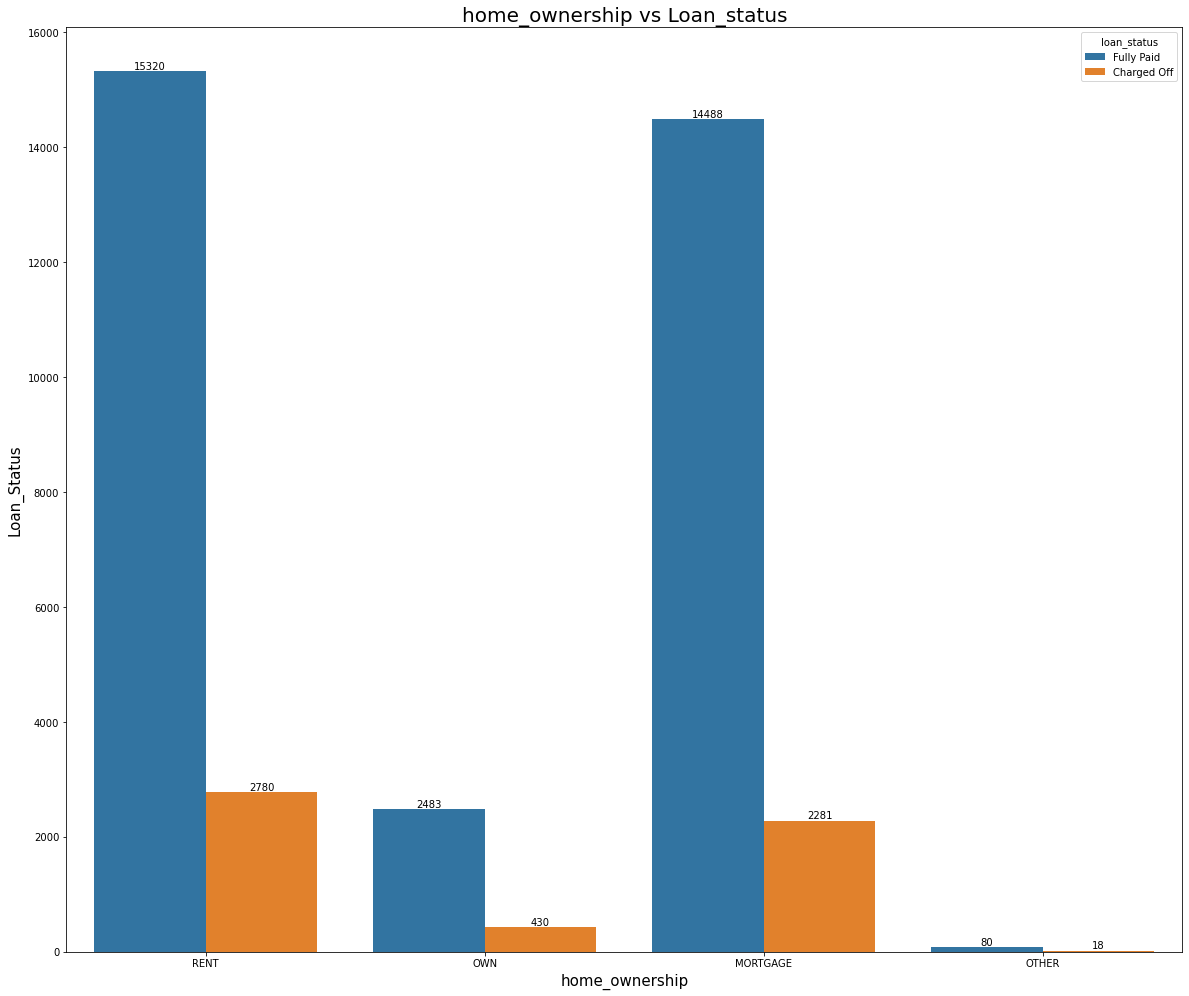

In [355]:
# Home Ownership vs loan status
plt.figure(figsize=(20, 17))
sns.countplot(x="home_ownership", hue="loan_status", data=loan_df)
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10)
plt.xlabel("home_ownership", fontsize=15)
plt.ylabel("Loan_Status", fontsize=15)
plt.title("home_ownership vs Loan_status", fontsize=20)
plt.show()

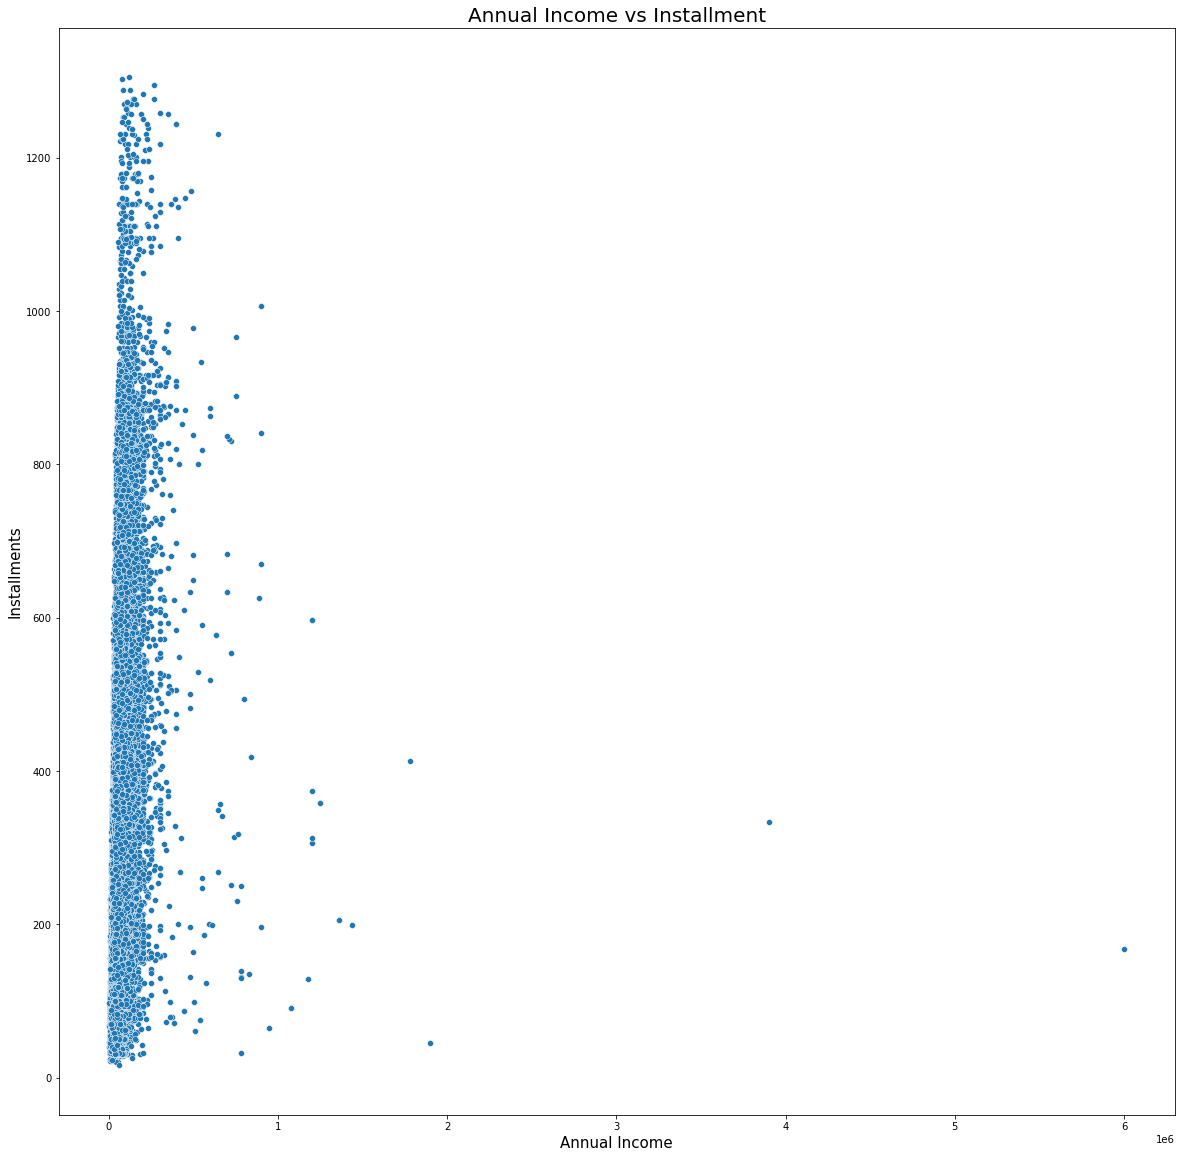

In [356]:
# Annual income vs installment 
plt.figure(figsize=[20,20])
sns.scatterplot(x="annual_inc", y = "installment", data=loan_df)
plt.title("Annual Income vs Installment", fontsize=20)
plt.xlabel("Annual Income", fontsize=15)
plt.ylabel("Installments", fontsize=15)
plt.show()

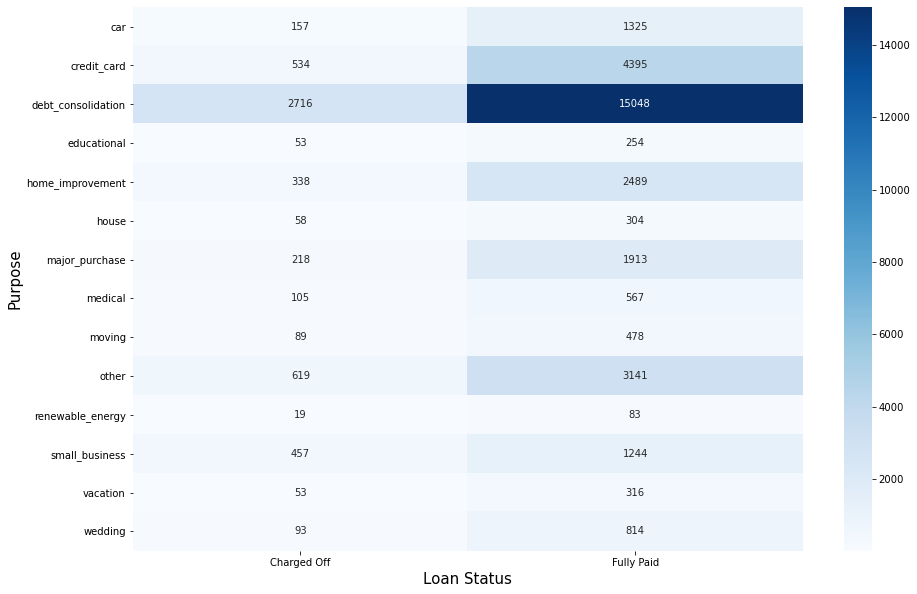

In [357]:
# Loan Status vs Purpose
plt.figure(figsize=[15,10])
crosstab = pd.crosstab(loan_df['purpose'], loan_df['loan_status'])
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Loan Status", fontsize=15)
plt.ylabel("Purpose", fontsize=15)
plt.show()

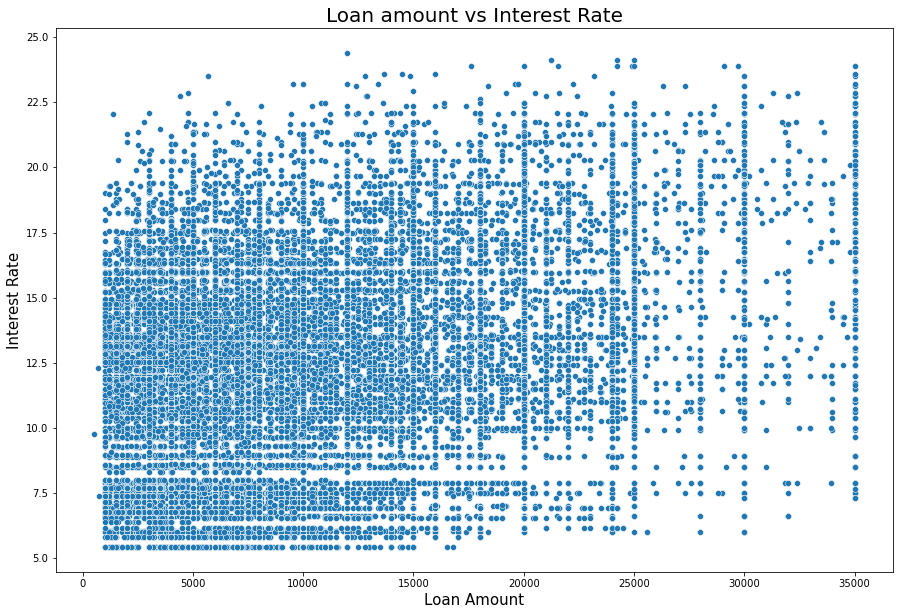

<Figure size 1080x720 with 0 Axes>

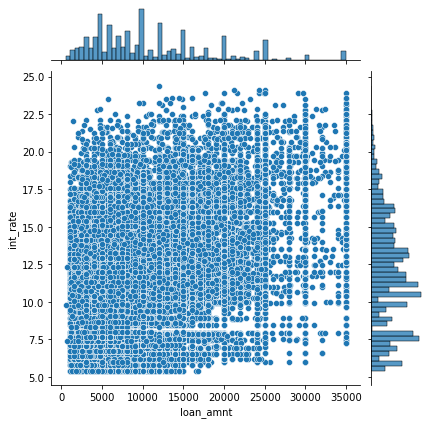

In [360]:
# loan_amnt vs int_rate
plt.figure(figsize=[15,10])
sns.scatterplot(data=loan_df, x='loan_amnt', y='int_rate')
plt.title("Loan amount vs Interest Rate", fontsize=20)
plt.xlabel("Loan Amount", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15)
plt.figure(figsize=[15,10])
sns.jointplot(data=loan_df, x='loan_amnt', y='int_rate', kind='scatter')
plt.xlabel("Loan Amount", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15)
plt.show()

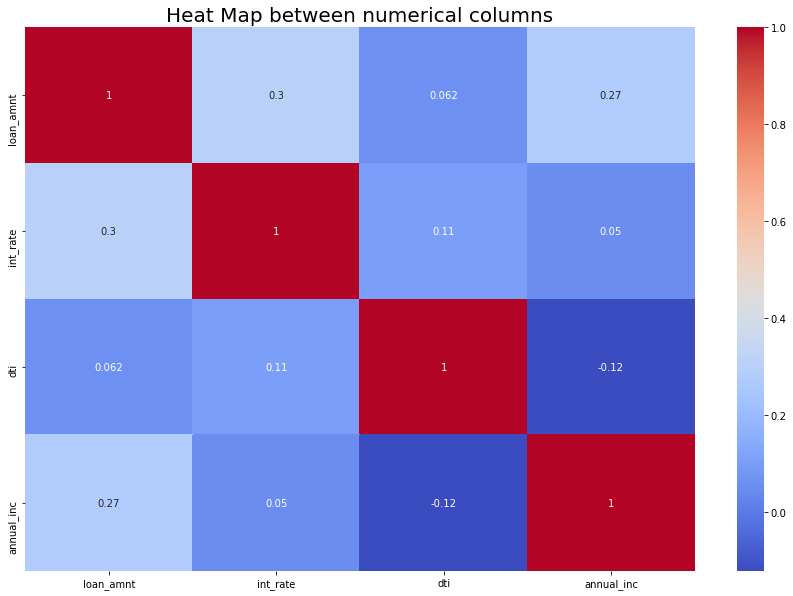

In [365]:
plt.figure(figsize=[15,10])
corr_matrix = loan_df[['loan_amnt', 'int_rate', 'dti', 'annual_inc']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heat Map between numerical columns", fontsize=20)
plt.show()

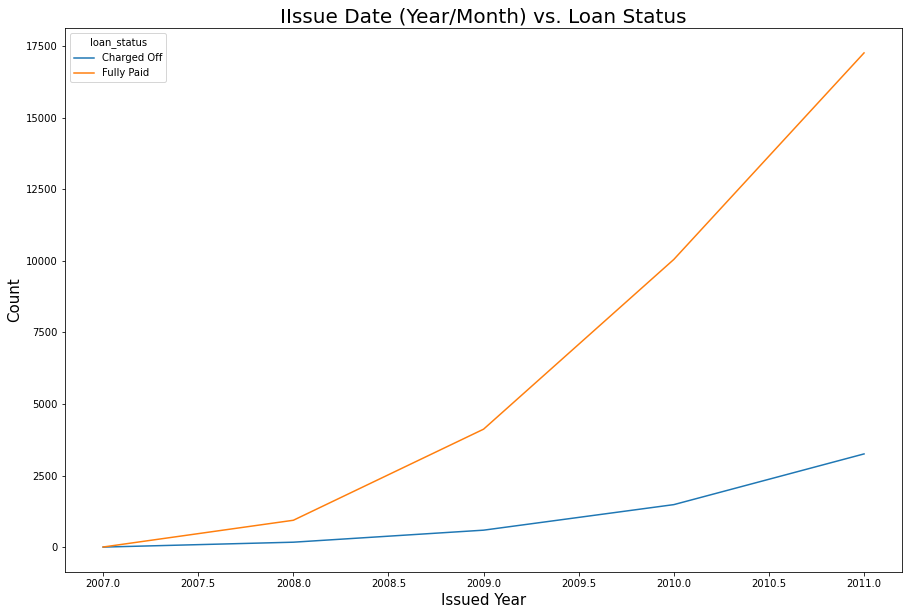

In [364]:
# isused_year vs count
plt.figure(figsize=[15,10])
time_grouped = loan_df.groupby(['issue_d_year', 'loan_status']).size().reset_index(name='count')
sns.lineplot(data=time_grouped, x='issue_d_year', y='count', hue='loan_status')
plt.xlabel("Issued Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("IIssue Date (Year/Month) vs. Loan Status", fontsize=20)
plt.show()

# Multivariate analysis

### Multivariate analysis examines relationships, patterns, or interactions among three or more variables simultaneously. It is used to understand complex data relationships, identify key factors, and make predictions by analyzing how multiple variables influence each other or a target outcome.

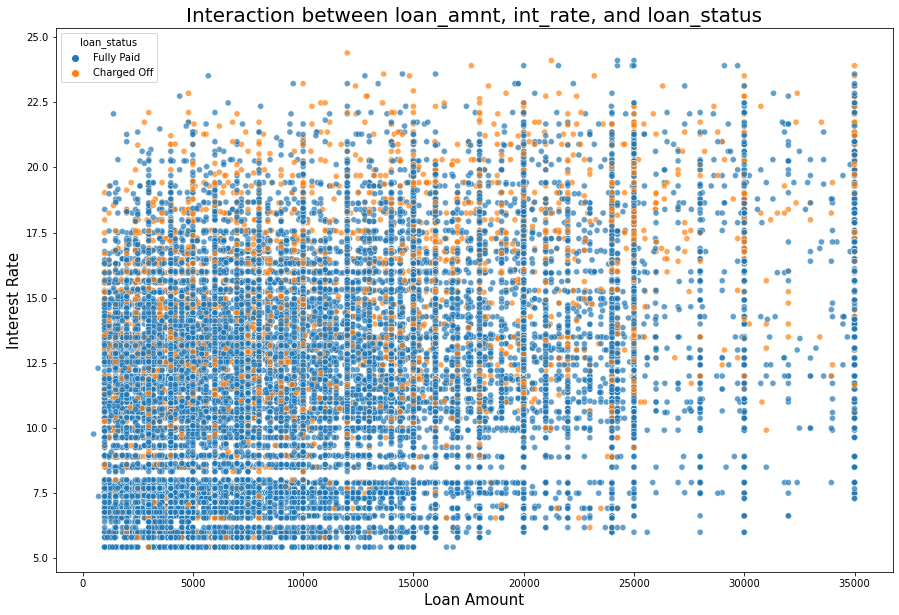

In [367]:
# Interaction between loan_amnt, int_rate, and loan_status
plt.figure(figsize=[15,10])
sns.scatterplot(data=loan_df, x='loan_amnt', y='int_rate', hue='loan_status', alpha=0.7)
plt.title("Interaction between loan_amnt, int_rate, and loan_status",fontsize=20)
plt.xlabel("Loan Amount", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15)
plt.show()

This graph helps identify if defaulters tend to take higher loans with higher interest rates.


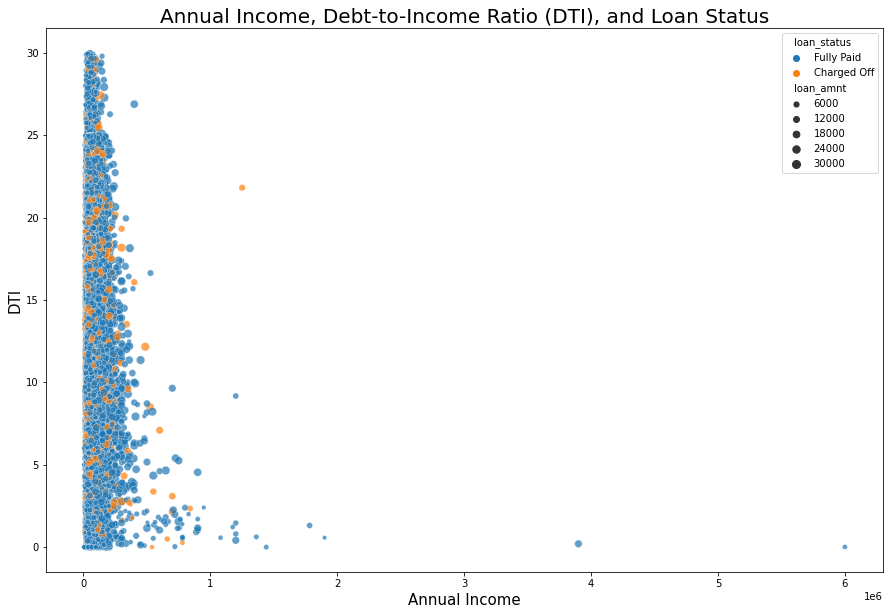

In [369]:
#Annual Income, Debt-to-Income Ratio (DTI), and Loan Status
plt.figure(figsize=[15,10])
sns.scatterplot(data=loan_df, x='annual_inc', y='dti', hue='loan_status', size='loan_amnt', alpha=0.7)
plt.title("Annual Income, Debt-to-Income Ratio (DTI), and Loan Status", fontsize=20)
plt.xlabel("Annual Income", fontsize=15)
plt.ylabel("DTI", fontsize=15)
plt.show()

Use this to observe if defaulters have specific income and DTI patterns, and whether larger loans are concentrated in specific areas.

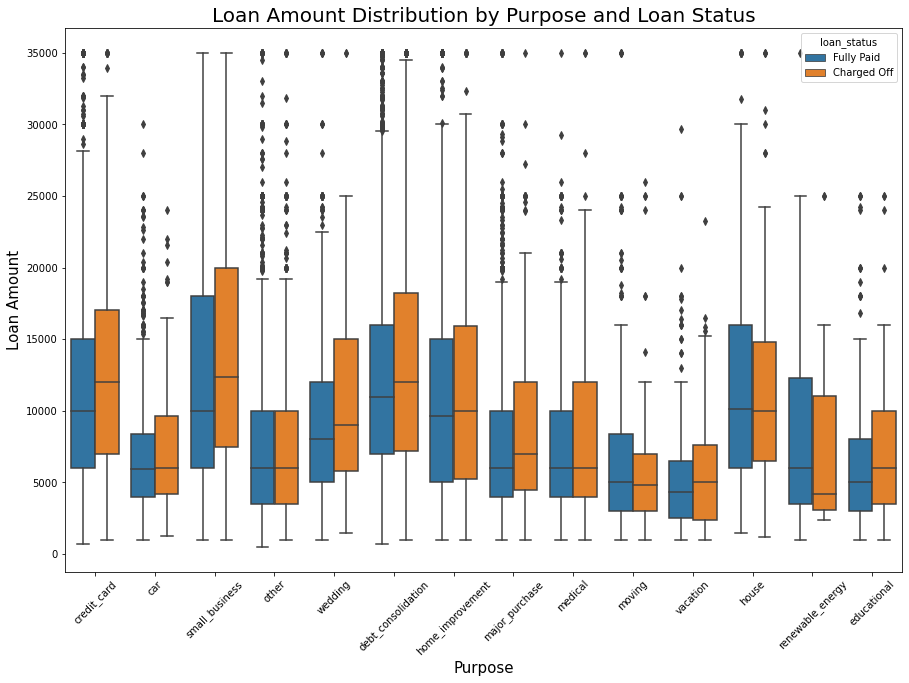

In [370]:
# Loan Amount, Purpose, and Loan Status 
plt.figure(figsize=[15,10])
sns.boxplot(data=loan_df, x='purpose', y='loan_amnt', hue='loan_status')
plt.xticks(rotation=45)  
plt.xlabel("Purpose", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15)
plt.title("Loan Amount Distribution by Purpose and Loan Status", fontsize=20)
plt.show()

Identify if defaulters are concentrated in specific purposes (e.g., credit card loans) and if loan amounts differ by purpose.


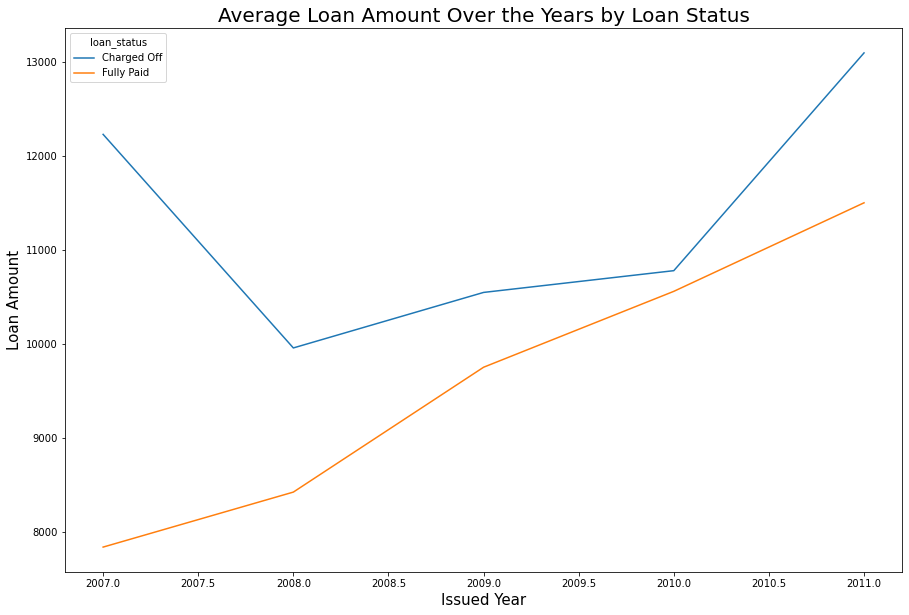

In [371]:
# Issue Date (Year/Month), Loan Status, and Loan Amount
plt.figure(figsize=[15,10])
time_grouped = loan_df.groupby(['issue_d_year', 'loan_status'])['loan_amnt'].mean().reset_index()
sns.lineplot(data=time_grouped, x='issue_d_year', y='loan_amnt', hue='loan_status')
plt.xlabel("Issued Year", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15)
plt.title("Average Loan Amount Over the Years by Loan Status", fontsize=20)
plt.show()

Identify if certain years or months have a higher likelihood of defaults and larger loans.


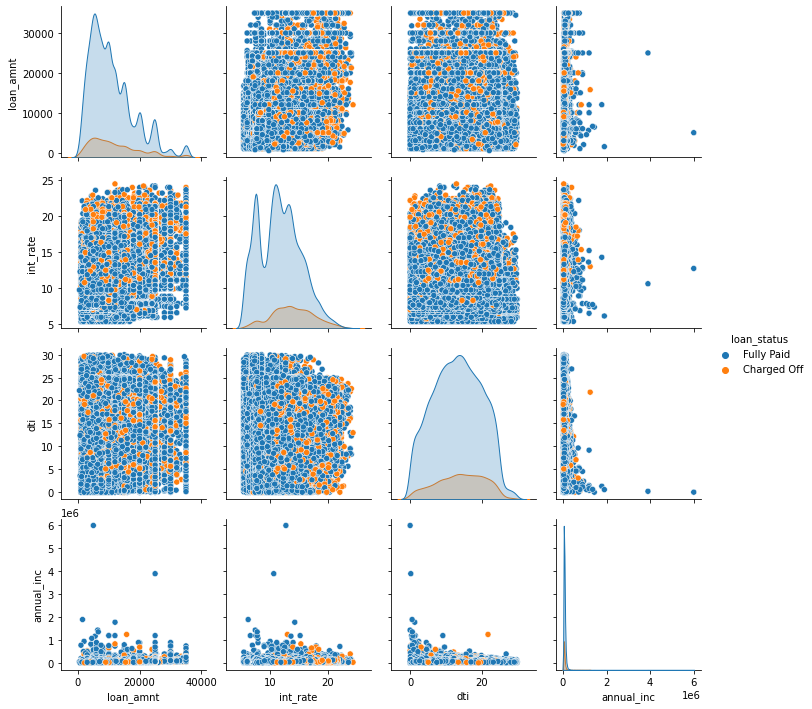

In [372]:
# Pairplot for Multivariate Analysis
# Examine pairwise relationships among multiple numerical variables while also observing their distributions.
sns.pairplot(loan_df, vars=['loan_amnt', 'int_rate', 'dti', 'annual_inc'], hue='loan_status', diag_kind='kde')
plt.show()

Understand how multiple numerical variables interact and contribute to loan defaults.


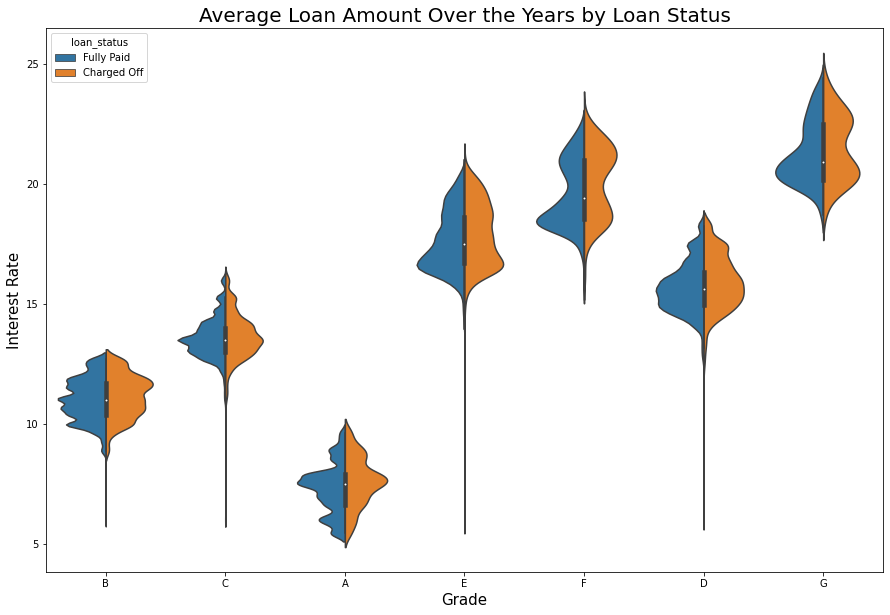

In [376]:
# Loan Status, Grade, and Interest Rate
# Investigate the interaction between grades, interest rates, and loan statuses.
plt.figure(figsize=[15,10])
sns.violinplot(data=loan_df, x='grade', y='int_rate', hue='loan_status', split=True)
plt.title("Average Loan Amount Over the Years by Loan Status",fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15)
plt.show()

See if certain grades (e.g., subprime loans) are associated with higher interest rates and defaults.


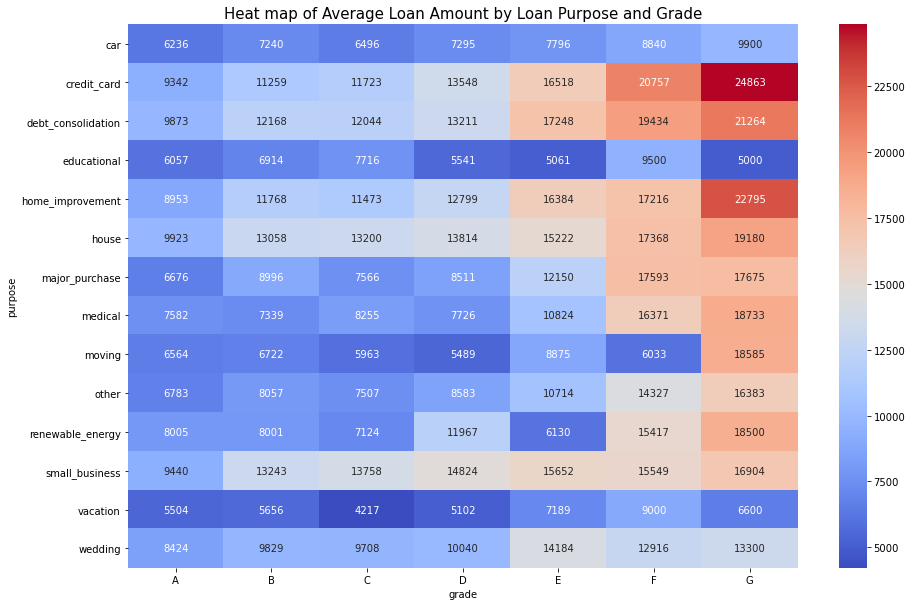

In [378]:
# Loan Purpose, Loan Grade, and Loan Amount
plt.figure(figsize=[15,10])
pivot_table = loan_df.pivot_table(index='purpose', columns='grade', values='loan_amnt', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm')
plt.title("Heat map of Average Loan Amount by Loan Purpose and Grade", fontsize=15)
plt.show()

In [379]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0  1077501    1296599       5000         5000           4975.0   
1  1077430    1314167       2500         2500           2500.0   
2  1077175    1313524       2400         2400           2400.0   
3  1076863    1277178      10000        10000          10000.0   
5  1075269    1311441       5000         5000           5000.0   

  term(in months)  int_rate  installment grade sub_grade  emp_length  \
0              36     10.65       162.87     B        B2          10   
1              60     15.27        59.83     C        C4           0   
2              36     15.96        84.33     C        C5          10   
3              36     13.49       339.31     C        C1          10   
5              36      7.90       156.46     A        A4           3   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0            Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0            Verified 2011-12-01   Fully Paid   
5           RENT     36000.0            Verified 2011-12-01   Fully Paid   

          purpose addr_state    dti earliest_cr_line  revol_bal  total_acc  \
0     credit_card         AZ  27.65       1985-01-01      13648          9   
1             car         GA   1.00       1999-04-01       1687          4   
2  small_business         IL   8.72       2001-11-01       2956         10   
3           other         CA  20.00       1996-02-01       5598         37   
5         wedding         AZ  11.20       2004-11-01       7963         12   

   total_rec_prncp  total_rec_int  total_rec_late_fee  last_pymnt_amnt  \
0          5000.00         863.16                0.00           171.62   
1           456.46         435.17                0.00           119.66   
2          2400.00         605.67                0.00           649.91   
3         10000.00        2214.92               16.97           357.48   
5          5000.00         632.21                0.00           161.03   

   pub_rec_bankruptcies issue_d_year issue_d_month issue_d_day  \
0                   0.0         2011           Dec           1   
1                   0.0         2011           Dec           1   
2                   0.0         2011           Dec           1   
3                   0.0         2011           Dec           1   
5                   0.0         2011           Dec           1   

  earliest_cr_year earliest_cr_month loan_amnt_bucket int_rate_bucket  \
0             1985               Jan           5K-10K          9%-13%   
1             1999               Apr             0-5K         13%-17%   
2             2001               Nov             0-5K         13%-17%   
3             1996               Feb          10K-15K         13%-17%   
5             2004               Nov           5K-10K           5%-9%   

  funded_amnt_bucket  
0             5K-10K  
1               0-5K  
2               0-5K  
3            10K-15K  
5             5K-10K

In [382]:
loan_df.shape

(37880, 35)

# UNVARIATE ANALYSIS INSIGHTS

1. Certain purposes, like "credit card" and "small business," might be associated with a higher risk of default due to larger loan amounts and potentially higher risk profiles of borrowers.

2. Debt consolidation loans might be associated with a higher risk of default if borrowers are unable to manage their finances effectively after consolidation.

3. Employees who have an experience of 10+ years will more likely take higher loan amounts (approx 30,000-35,000 USD) compared to those who have less years of experience, i.e. below 3 years.  

4. Applicants with higher grades (A and B) might pose a lower risk of default, as they have demonstrated consistent academic performance.

5. Applicants with lower grades (E, F, and G) might have a higher risk of default, as their academic performance suggests potential financial challenges or lower motivation.

6. California topped the list with 1,055 loan defaults, suggesting that the lending company should implement more stringent eligibility requirements or credit evaluations for applicants from this state to mitigate future risks.


7. The monthly installment amount on the loan is between 180 - 430

8. Applicants with higher sub-grades (A1, A2, etc.) are likely to have a lower default risk, as these sub-grades are associated with better creditworthiness and lower risk profiles.


9. Applicants with lower sub-grades (F1, F2, etc.) are more likely to have a higher default risk, as these sub-grades are associated with poorer creditworthiness and higher risk profiles.

10. The terms of the loan, such as interest rate, repayment period, and fees, can also influence default risk. Higher interest rates and shorter repayment periods can make it more difficult for borrowers to repay their loans.


# SEGMENTED UNIVARIATE ANALYSIS INSIGHTS

1. A majority of loans are concentrated around the $10,000 mark, suggesting that smaller loan amounts are more likely to be fully repaid.

2. Loans in the $5,000–$15,000 range exhibit a significant overlap between those that were fully repaid and those that were charged off.

3. Grade A loans have the lowest median interest rate (~6%), while Grade G loans exhibit the highest median rate (~22%).

4. Individuals with a smaller number of credit accounts (0-20) are more likely to default on their loans, suggesting that limited credit history can contribute to financial instability.

5. Borrowers seeking loans for "small business" or "house" purposes typically take on the highest average amounts, exceeding $12,000. These categories reflect substantial financial commitments, with associated risks potentially influenced by factors such as market stability and personal income.

6. Towards the end of the year, customers may face heightened financial pressures from holiday spending and potential interest rate increases, which could lead to a higher risk of default.


# BIVARIATE ANALYSIS INSIGHTS

1. High DTI ratios could be a strong indicator of potential default. Borrowers with a significant portion of their income already committed to debt might struggle to meet additional loan obligations.

2. Higher interest rates could increase the likelihood of default, especially for borrowers with lower incomes or higher DTI ratios.
W
3. hile a large loan amount may not be a direct indicator of default, it could be a risk factor when combined with other factors like DTI and interest rate.

4. Grades A and B have the largest number of fully paid loans, suggesting that borrowers in these grades are the least risky.

5. Grades C and D show a noticeable increase in defaults compared to A and B.

6. This suggests that mid-tier grades involve higher risk, likely reflecting moderate creditworthiness.

7. Sub-grades in the A tier (e.g., A1, A2) show the highest proportion of fully paid loans with very low defaults, emphasizing that borrowers in these sub-grades are highly reliable.

8. The data indicates that loans issued in December tend to have a better repayment performance than those issued earlier in the year. This trend might be attributed to factors such as year-end bonuses or timely repayment to avoid higher interest charges. Conversely, December also witnesses the highest number of defaults, which could be due to increased financial burdens during the holiday season or difficulties in meeting increased interest payments.

9. Loans for debt consolidation, credit card, and other purposes might be associated with a higher risk of default.

10. Those who a RENT a home tend to have a higher loan status of 15,320 and fully pay it off compared to those who charged off have a loan status of 2,780. 

11. Small loans (<$10,000) often come with high interest rates (>15%), reflecting higher risk.


# MULTIVARIATE ANALYSIS INSIGHTS

1. The data suggests a correlation between loan size and interest rate with the likelihood of default. Larger loans with higher interest rates seem to be more prone to charge-offs.

2. A high DTI ratio is a strong indicator of potential default. Borrowers with a significant portion of their income already committed to debt might struggle to meet additional loan obligations.

3. Larger loan amounts, especially when combined with a high DTI, could increase the risk of default.

4. Larger loan amounts, regardless of purpose, appear to be associated with a higher risk of default, example is those who take a loan of 20,000+ USD tend to default more than those who took a loan between the range of 10,000-15,000 USD

5. Interest rates are concentrated in the lower range, with a few outliers on the higher end.

6. As the loan grade increases from A to G, the average loan amount generally increases. This suggests that borrowers with lower credit scores tend to receive smaller loans, likely due to higher perceived risk.

7. For Debt Consolidation and Credit Card loans, even the lower grades (D, E, F, G) have relatively high average loan amounts compared to other loan purposes. This suggests that these categories might be riskier, as borrowers with lower credit scores are still able to obtain larger loans.

8. Educational and Moving loans have the lowest average loan amounts, suggesting that these loans are typically smaller in size.


# CONCLUSION 

# -- SUGGESTIONS


1. Implement a robust risk assessment framework that considers multiple factors, including income, debt-to-income ratio, credit history, and loan purpose, to identify high-risk loans.

2. Overall, the univariate analysis suggests a positive trend in the academic performance of the applicant pool. However, a more comprehensive analysis, incorporating other relevant factors, is necessary to make informed decisions about loan approval and risk assessment.

3. To gain a deeper understanding of the relationship between loan amount, funded amount, and default risk, it would be beneficial to analyze the data further by considering factors like:

    a. Borrower demographics (age, income, occupation)
    
    b. Loan purpose
    
    c. Creditworthiness metrics (credit score, debt-to-income ratio)
    
    d. Economic indicators (interest rates, unemployment rates)
 

4. Anticipate peak periods where default will most likely occur based on the analysis and prevent it so the company does not incur a loss 

5. Monitor and adjust interest rates 

6. Consider income levels 

7. Evaluate for those who took a loan for 60 months, as they are the customers who tend to default more. 
